# ***Case Study: Student grade evaluation***

### Senario
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires.In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades.


### Ask

#### Objective
To understand how different feathures effect the grades of the students of two Protuguese school.


#### Deliverable
* A description of all data sources used
* Documentation of any cleaning or manipulation of data
* A summary of the analysis
* Clear understanding of how each feature effects the grades of students
* Supporting visualizations and key findings
* Recommendations based on your analysis

### Prepare Data

#### Load Libraries

In [1]:
# load libraries
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(lubridate)
library(dplyr)
library(readr)
library(janitor)
library(data.table)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The

#### Load dataset

This dataset has records of studennts of Portuguese schools. 

In [2]:
# load data
student_data <- read.csv('../input/student-grade-prediction/student-mat.csv')

#### Checking all coloumns names and data-type

In [3]:
# details about the dataframe
colnames(student_data)
glimpse(student_data)

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

Rows: 395
Columns: 33
$ school     <chr> "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP",…
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F",…
$ age        <int> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15,…
$ address    <chr> "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U",…
$ famsize    <chr> "GT3", "GT3", "LE3", "GT3", "GT3", "LE3", "LE3", "GT3", "LE…
$ Pstatus    <chr> "A", "T", "T", "T", "T", "T", "T", "A", "A", "T", "T", "T",…
$ Medu       <int> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4,…
$ Fedu       <int> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3,…
$ Mjob       <chr> "at_home", "at_home", "at_home", "health", "other", "servic…
$ Fjob       <chr> "teacher", "other", "other", "services", "other", "other", …
$ reason     <chr> "course", "course", "other", "home", "home", "reputation", …
$ guardian   <chr> "mother", "father", "mother", "mother", "father", "mother",…
$ traveltime <int>

#### Removing columns that is not so relavant to this analysis

In [4]:
# reforming the dataframe
student_data_v2 <- student_data %>% select(-c(reason,guardian, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob,
                                              traveltime, nursery, romantic, Dalc, Walc))
glimpse(student_data_v2)

Rows: 395
Columns: 19
$ school     <chr> "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP",…
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F",…
$ age        <int> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15,…
$ studytime  <int> 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 3, 1, 3, 2, 1, 1,…
$ failures   <int> 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,…
$ schoolsup  <chr> "yes", "no", "yes", "no", "no", "no", "no", "yes", "no", "n…
$ famsup     <chr> "no", "yes", "no", "yes", "yes", "yes", "no", "yes", "yes",…
$ paid       <chr> "no", "no", "yes", "yes", "yes", "yes", "no", "no", "yes", …
$ activities <chr> "no", "no", "no", "yes", "no", "yes", "no", "no", "no", "ye…
$ higher     <chr> "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "ye…
$ internet   <chr> "no", "yes", "yes", "yes", "no", "yes", "yes", "no", "yes",…
$ famrel     <int> 4, 5, 4, 3, 4, 5, 4, 4, 4, 5, 3, 5, 4, 5, 4, 4, 3, 5, 5, 3,…
$ freetime   <int>

It seems, there are 14 columns that is not so important for this analysis. Now few of the removed column may effect the grade of students more or less as for example Father education(Fedu), Mother education(Medu), Father job(Fjob), Mother job(Mjob), travel time(traveltime). But these type of fields is not under control of school. The goal is to provide insight that can be implimemt to imporve students grades. Hence, 14 columns has been removed concidering it is not relavant to this analysis.

Desription of the fields :
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
5. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
6. schoolsup - extra educational support (binary: yes or no)
7. famsup - family educational support (binary: yes or no)
8. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
9. activities - extra-curricular activities (binary: yes or no)
10. higher - wants to take higher education (binary: yes or no)
11. internet - Internet access at home (binary: yes or no)
12. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
13. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
14. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
15. health - current health status (numeric: from 1 - very bad to 5 - very good)
16. absences - number of school absences (numeric: from 0 to 93)
17. G1 - first period grade (numeric: from 0 to 20)
18. G2 - second period grade (numeric: from 0 to 20)
19. G3 - final grade (numeric: from 0 to 20)

### Process data

It is important to process data before start analysis. As it may contain null values and errors.


In [5]:
# checking for null values
is.null(student_data_v2)
sum(duplicated(student_data_v2))

[1] FALSE

[1] 0

* There is no null value.
* There is no duplicate value.
* As we checked before, data type pf all fields seems correct. so no changes needed there.


### Analysis

Now the data is processed, analysis can be done on it. 

#### Relation between Student gender and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,gender,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
GP,F,183,10.57923,10.39891,9.972678
GP,M,166,11.33735,11.20482,11.060241
MS,F,25,10.92000,10.32000,9.920000
MS,M,21,10.38095,10.04762,9.761905


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


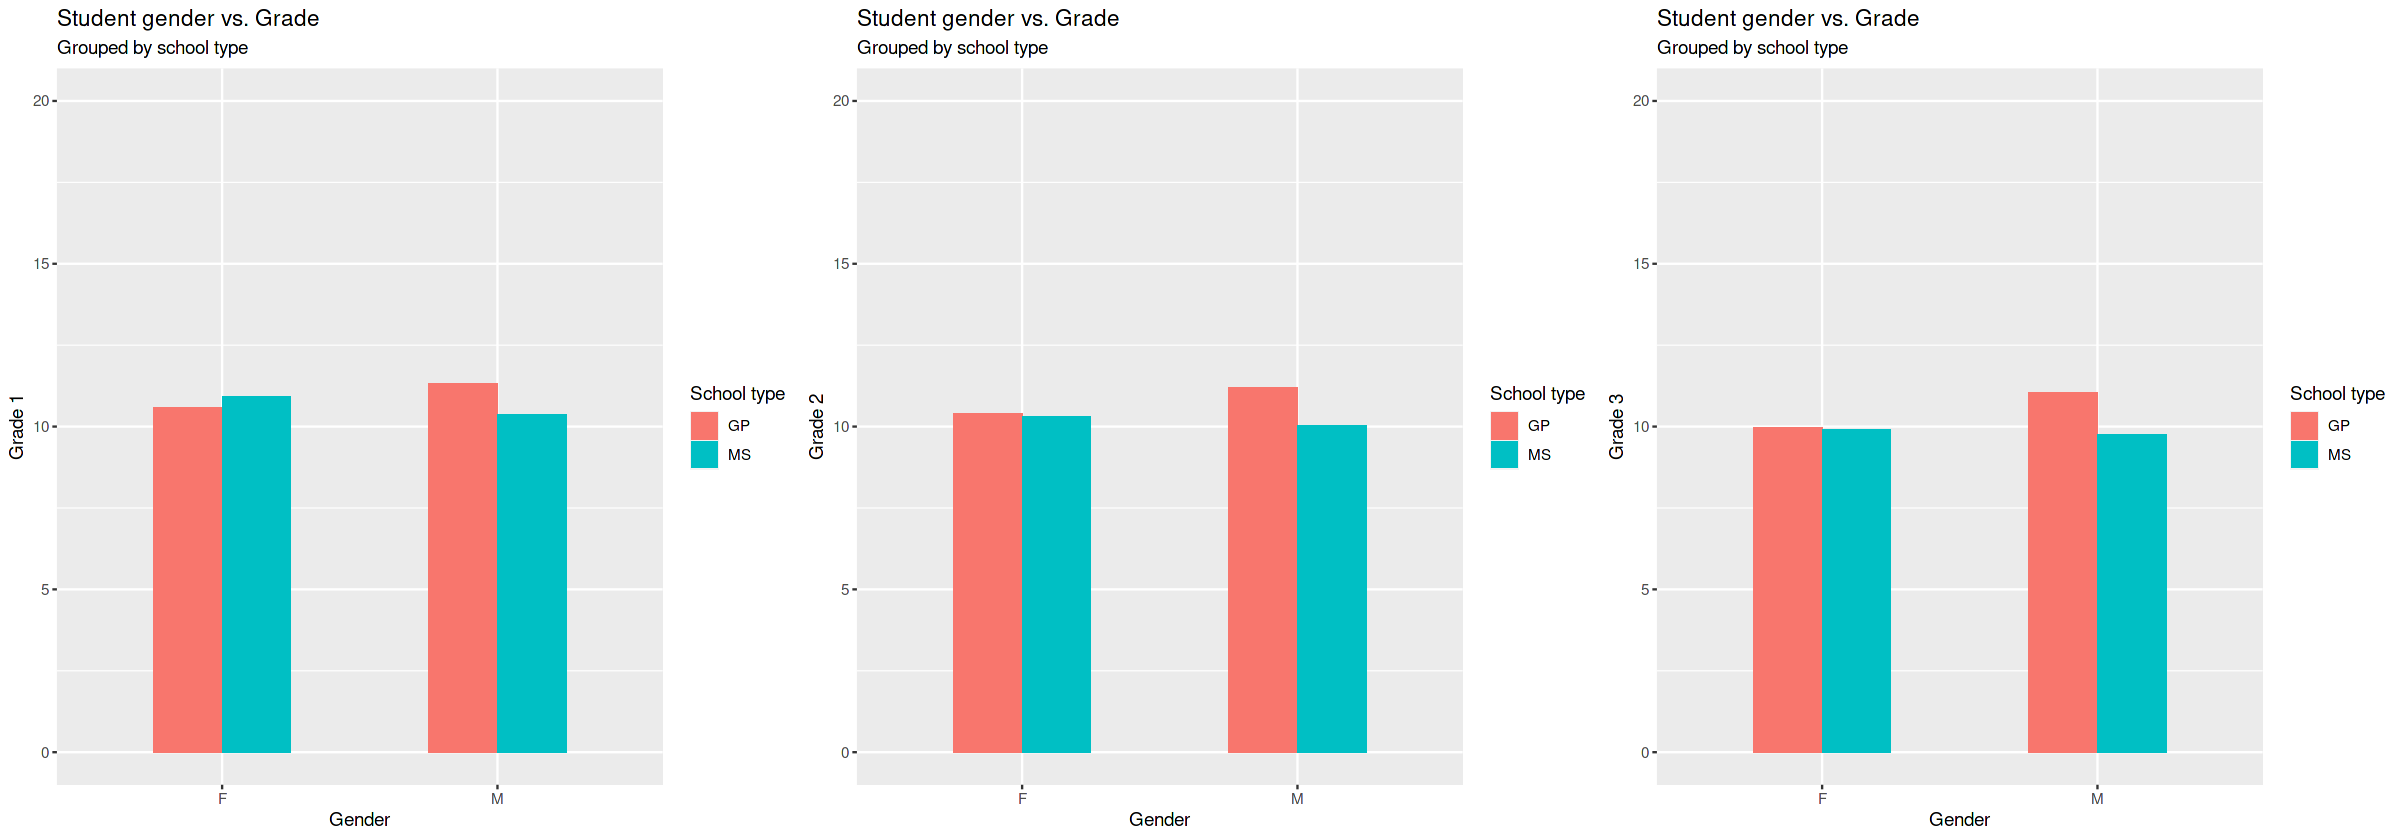

In [6]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school, gender = sex) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, gender = sex) %>%
summarise(count = n(), avarage_grade_1 = mean(G1) ) %>%
ggplot(aes(x = gender, y = avarage_grade_1, fill = school)) +
labs(title = 'Student gender vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Gender', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, gender = sex) %>%
summarise(count = n(), avarage_grade_2 = mean(G2) ) %>%
ggplot(aes(x = gender, y = avarage_grade_2, fill = school)) +
labs(title = 'Student gender vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Gender', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3 data represented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, gender = sex) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x = gender, y = avarage_grade_3, fill = school)) +
labs(title = 'Student gender vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Gender', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* For the first term, Felame students of MS has better avarage than female students of GP where as GP male students has better avarage than male students of MS.

* For the second term, Felame students of GP and MS has almost same avarage grade where as GP male students has better avarage than male students of MS.

* The final term avarage grade outcome almost same as second term.

* By taking a good look at all three graph it can be said that GP male students did fairly better on all three terms.


#### Relation between student age and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,age,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
GP,15,82,11.231707,11.365854,11.256098
GP,16,104,10.942308,11.182692,11.028846
GP,17,86,10.802326,10.383721,10.232558
GP,18,57,10.614035,9.964912,9.157895
GP,19,18,11.222222,10.055556,9.055556
GP,20,1,17.000000,18.000000,18.000000
GP,22,1,6.000000,8.000000,8.000000
MS,17,12,11.583333,11.166667,10.583333
MS,18,25,10.960000,10.520000,10.440000


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


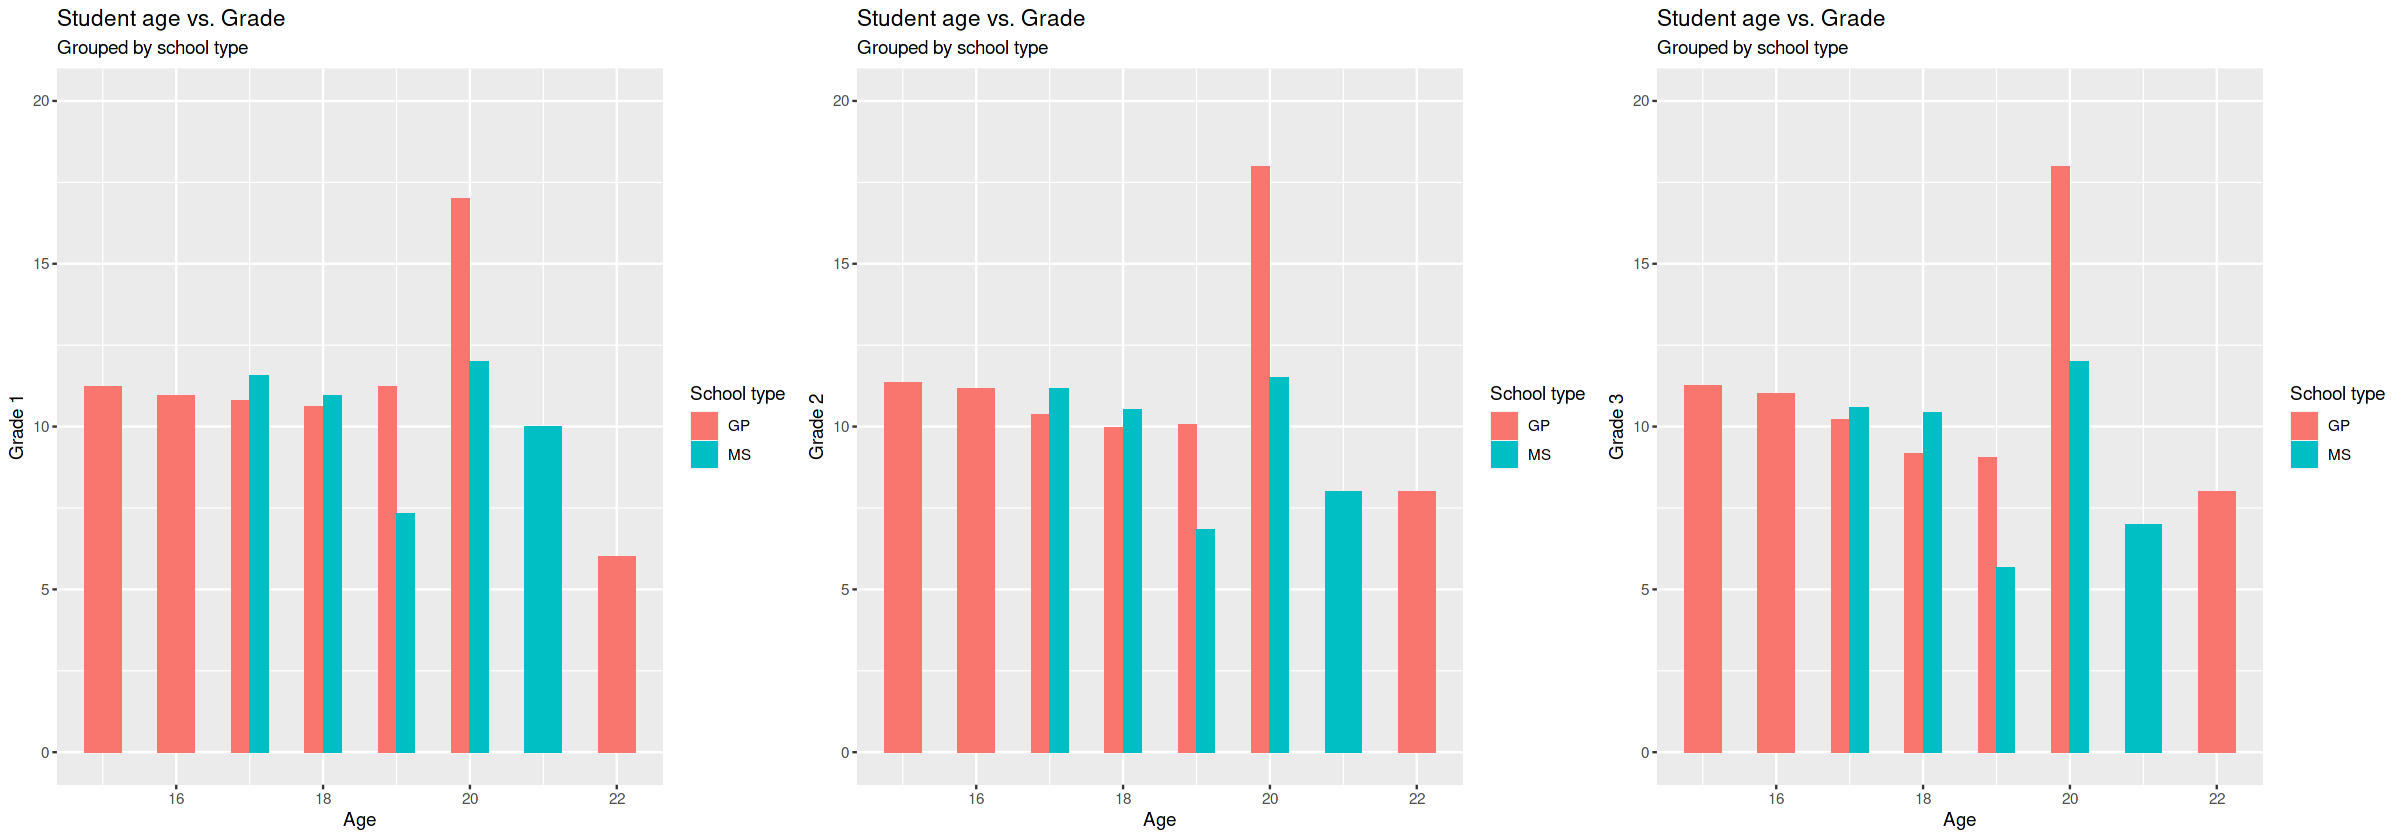

In [7]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school, age) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, age) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = age, y = avarage_grade_1, fill = school)) +
labs(title = 'Student age vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Age', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, age) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = age, y = avarage_grade_2, fill = school)) +
labs(title = 'Student age vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Age', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3 data represented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, age) %>%
summarise(count = n(), avarage_grade_3 = mean(G3)) %>%
ggplot(aes(x = age, y = avarage_grade_3, fill = school)) +
labs(title = 'Student age vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Age', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* GP Students of age 20 performed best in all three exam and students of age 22 did most bad score.
* MS students of age around 17,18 and 20 did best score and most avarage score achieved by the students of age 20 where as students of age 19 did most bad score.

#### Relation between study time and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,Study_time,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
GP,1,89,10.70787,10.58427,10.43820
GP,2,176,10.59091,10.46591,10.11932
GP,3,57,11.92982,11.47368,11.35088
GP,4,27,11.88889,12.03704,11.25926
MS,1,16,8.93750,8.56250,7.87500
MS,2,22,11.13636,10.81818,10.59091
MS,3,8,12.87500,11.75000,11.75000


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


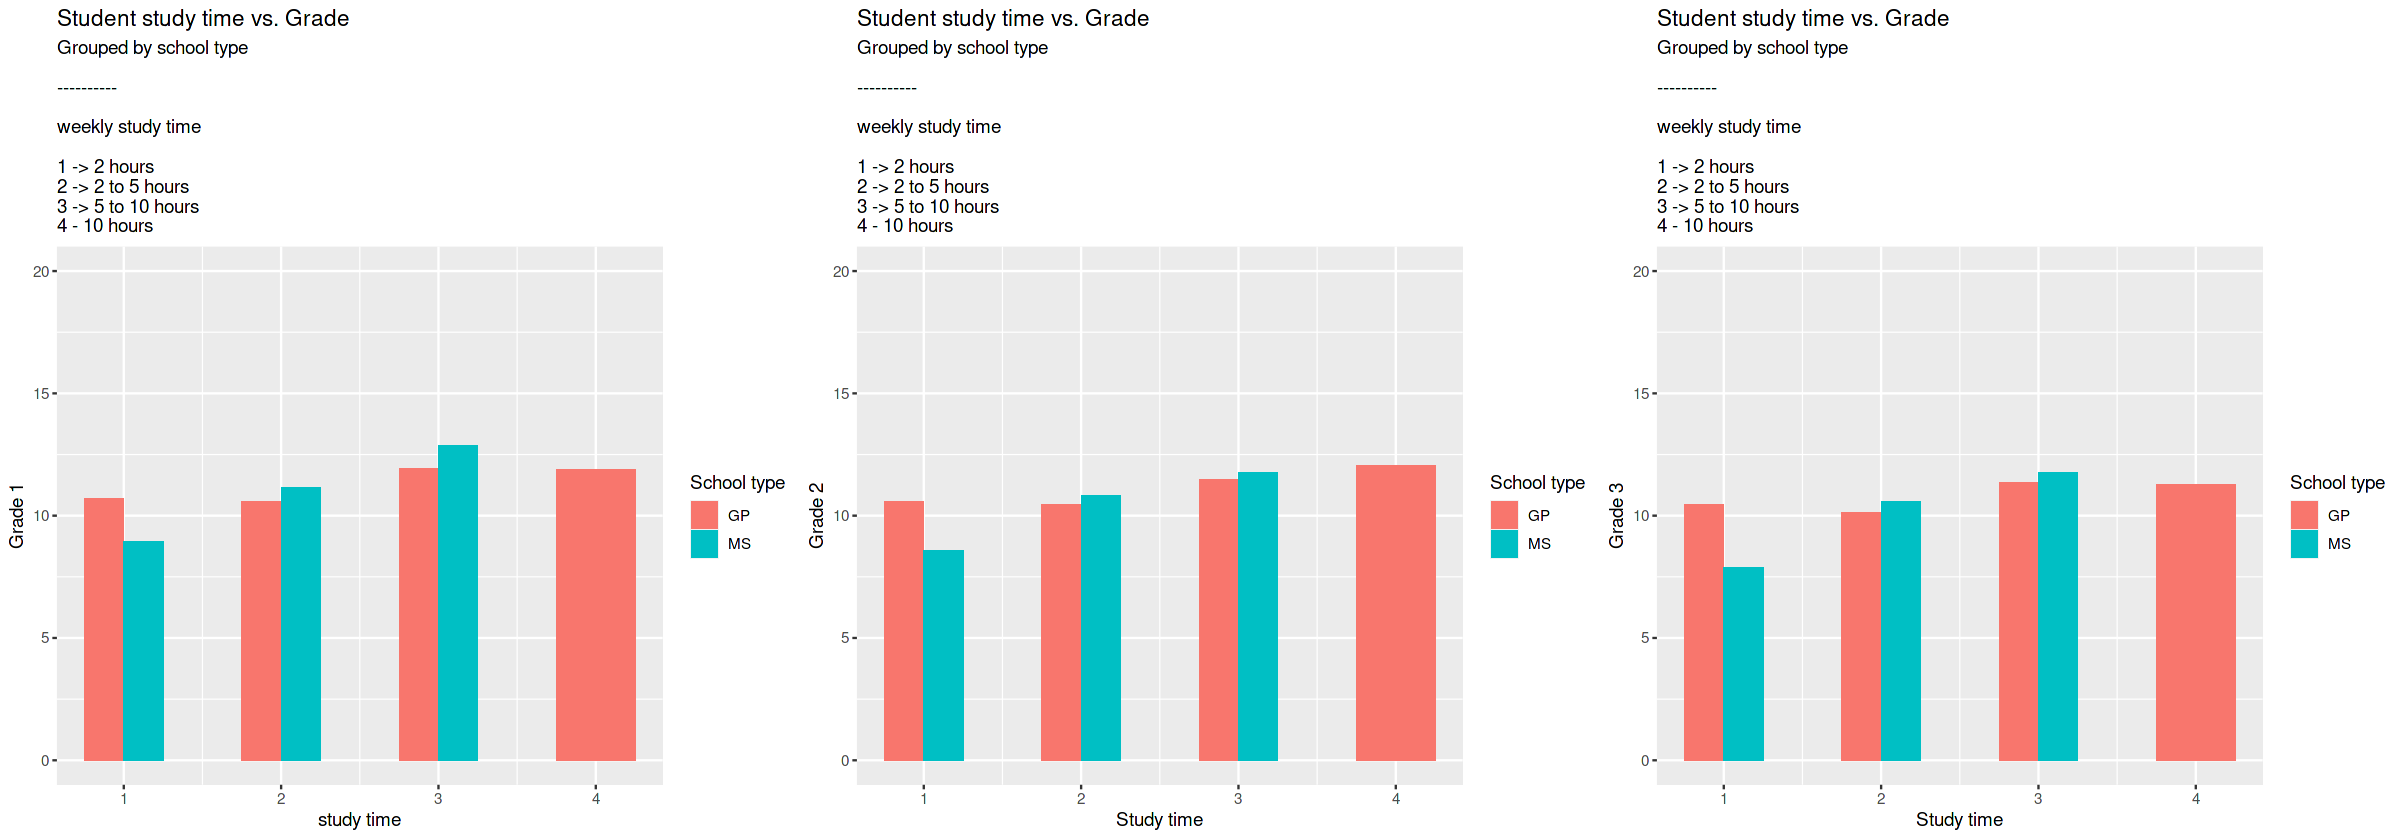

In [8]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school, Study_time = studytime) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, study_time = studytime) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = study_time, y = avarage_grade_1, fill = school)) +
labs(title = 'Student study time vs. Grade',subtitle = 'Grouped by school type \n\n----------\n\nweekly study time 
     \n1 -> 2 hours\n2 -> 2 to 5 hours\n3 -> 5 to 10 hours\n4 - 10 hours', 
     x = 'study time', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, study_time = studytime) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = study_time, y = avarage_grade_2, fill = school)) +
labs(title = 'Student study time vs. Grade',subtitle = 'Grouped by school type \n\n----------\n\nweekly study time 
     \n1 -> 2 hours\n2 -> 2 to 5 hours\n3 -> 5 to 10 hours\n4 - 10 hours', 
     x = 'Study time', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3 data represented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, study_time = studytime) %>%
summarise(count = n(), avarage_grade_3 = mean(G3)) %>%
ggplot(aes(x = study_time, y = avarage_grade_3, fill = school)) +
labs(title = 'Student study time vs. Grade',subtitle = 'Grouped by school type \n\n----------\n\nweekly study time 
     \n1 -> 2 hours\n2 -> 2 to 5 hours\n3 -> 5 to 10 hours\n4 - 10 hours', 
     x = 'Study time', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* For GP school students seems to have increase of grade marks as they study more.
* The result for MS school students seems to gotten better as they study more.

#### Relation between failures and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,failures,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
GP,0,280,11.457143,11.367857,11.257143
GP,1,41,9.902439,9.682927,8.780488
GP,2,14,7.928571,6.785714,5.214286
GP,3,14,6.642857,6.285714,5.428571
MS,0,32,11.562500,11.187500,11.218750
MS,1,9,8.000000,7.333333,5.111111
MS,2,3,10.333333,10.000000,11.000000
MS,3,2,9.000000,7.500000,7.500000


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


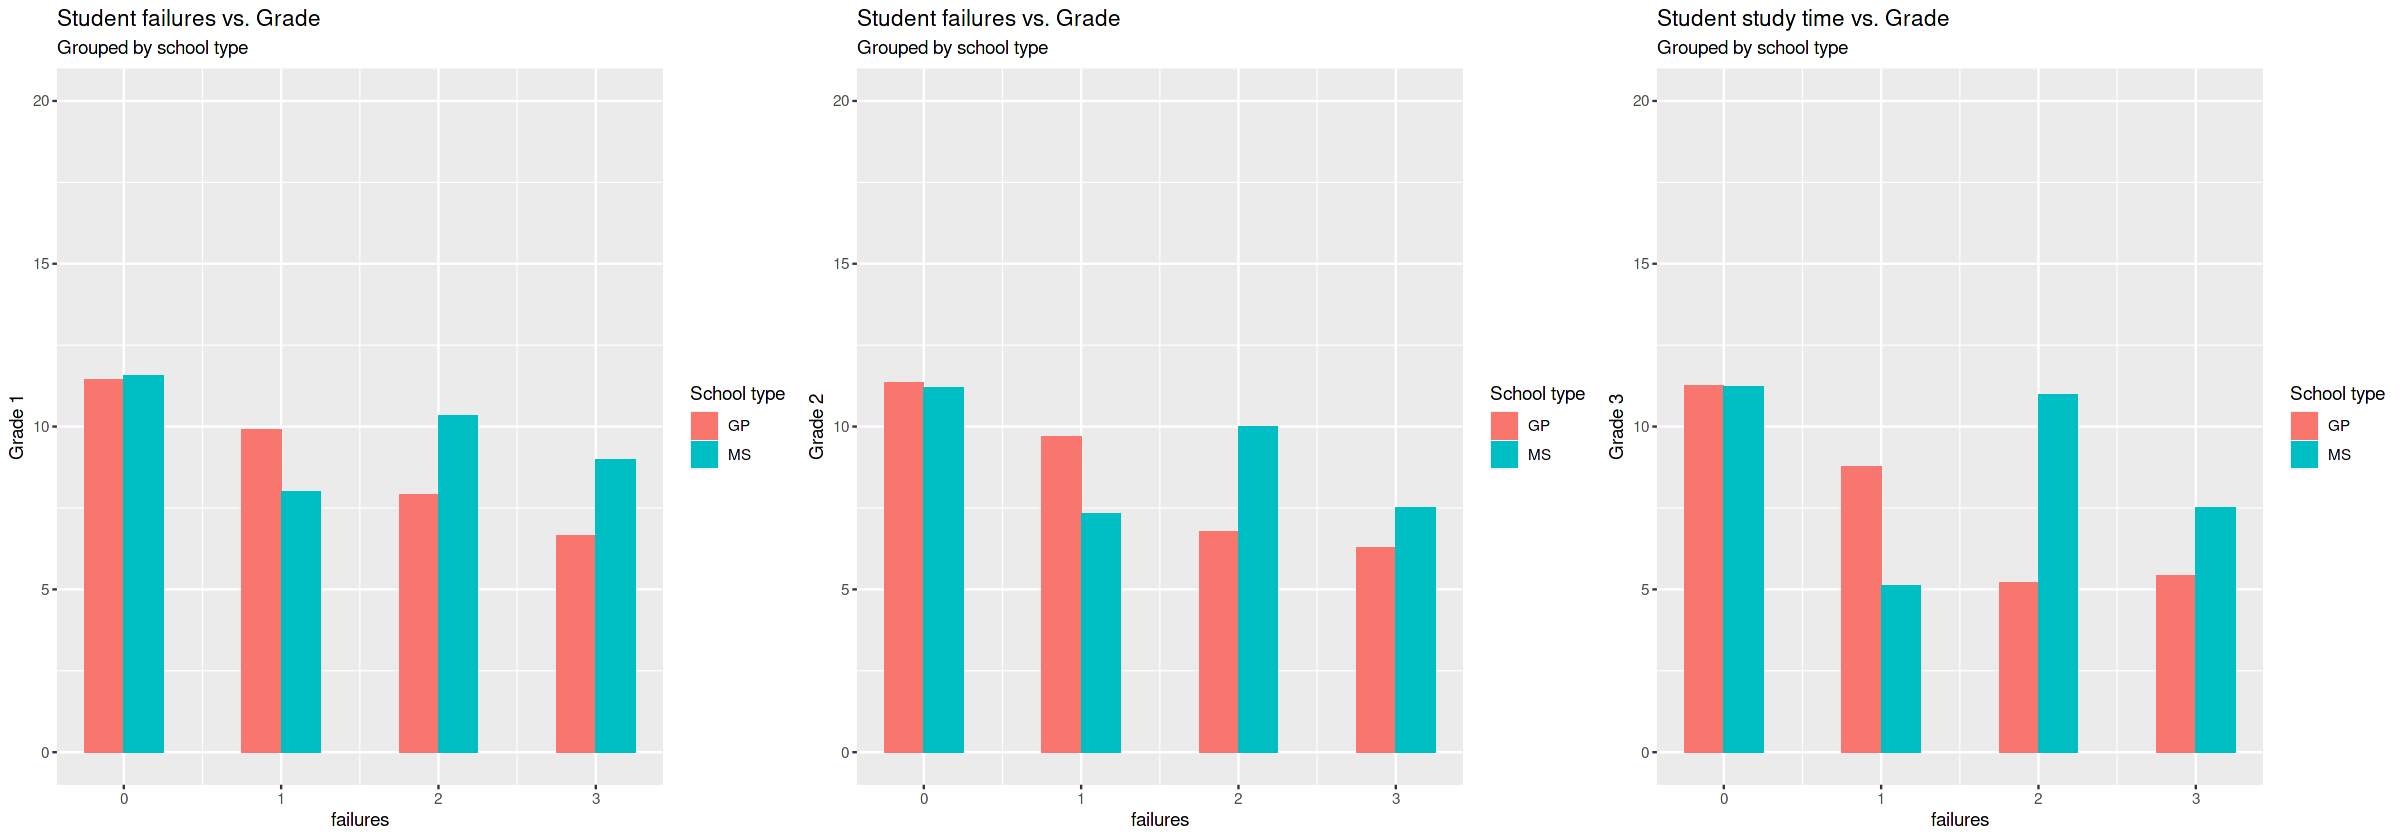

In [9]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school, failures) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, failures) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = failures, y = avarage_grade_1, fill = school)) +
labs(title = 'Student failures vs. Grade',subtitle = 'Grouped by school type', 
     x = 'failures', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, failures) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = failures, y = avarage_grade_2, fill = school)) +
labs(title = 'Student failures vs. Grade',subtitle = 'Grouped by school type', 
     x = 'failures', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3 data represented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, failures) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x = failures, y = avarage_grade_3, fill = school)) +
labs(title = 'Student study time vs. Grade',subtitle = 'Grouped by school type', 
     x = 'failures', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* Students of GP seems to have decrease in grades as they have more failures.
* Students of MS seems to have low grade who has 1 and 3 failures, and better grades who has 0 and 2 failures.

#### Relation between private tution and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,private_tution,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
GP,yes,51,9.078431,9.568627,9.431373
GP,no,298,11.258389,10.989933,10.671141
MS,no,46,10.673913,10.195652,9.847826


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


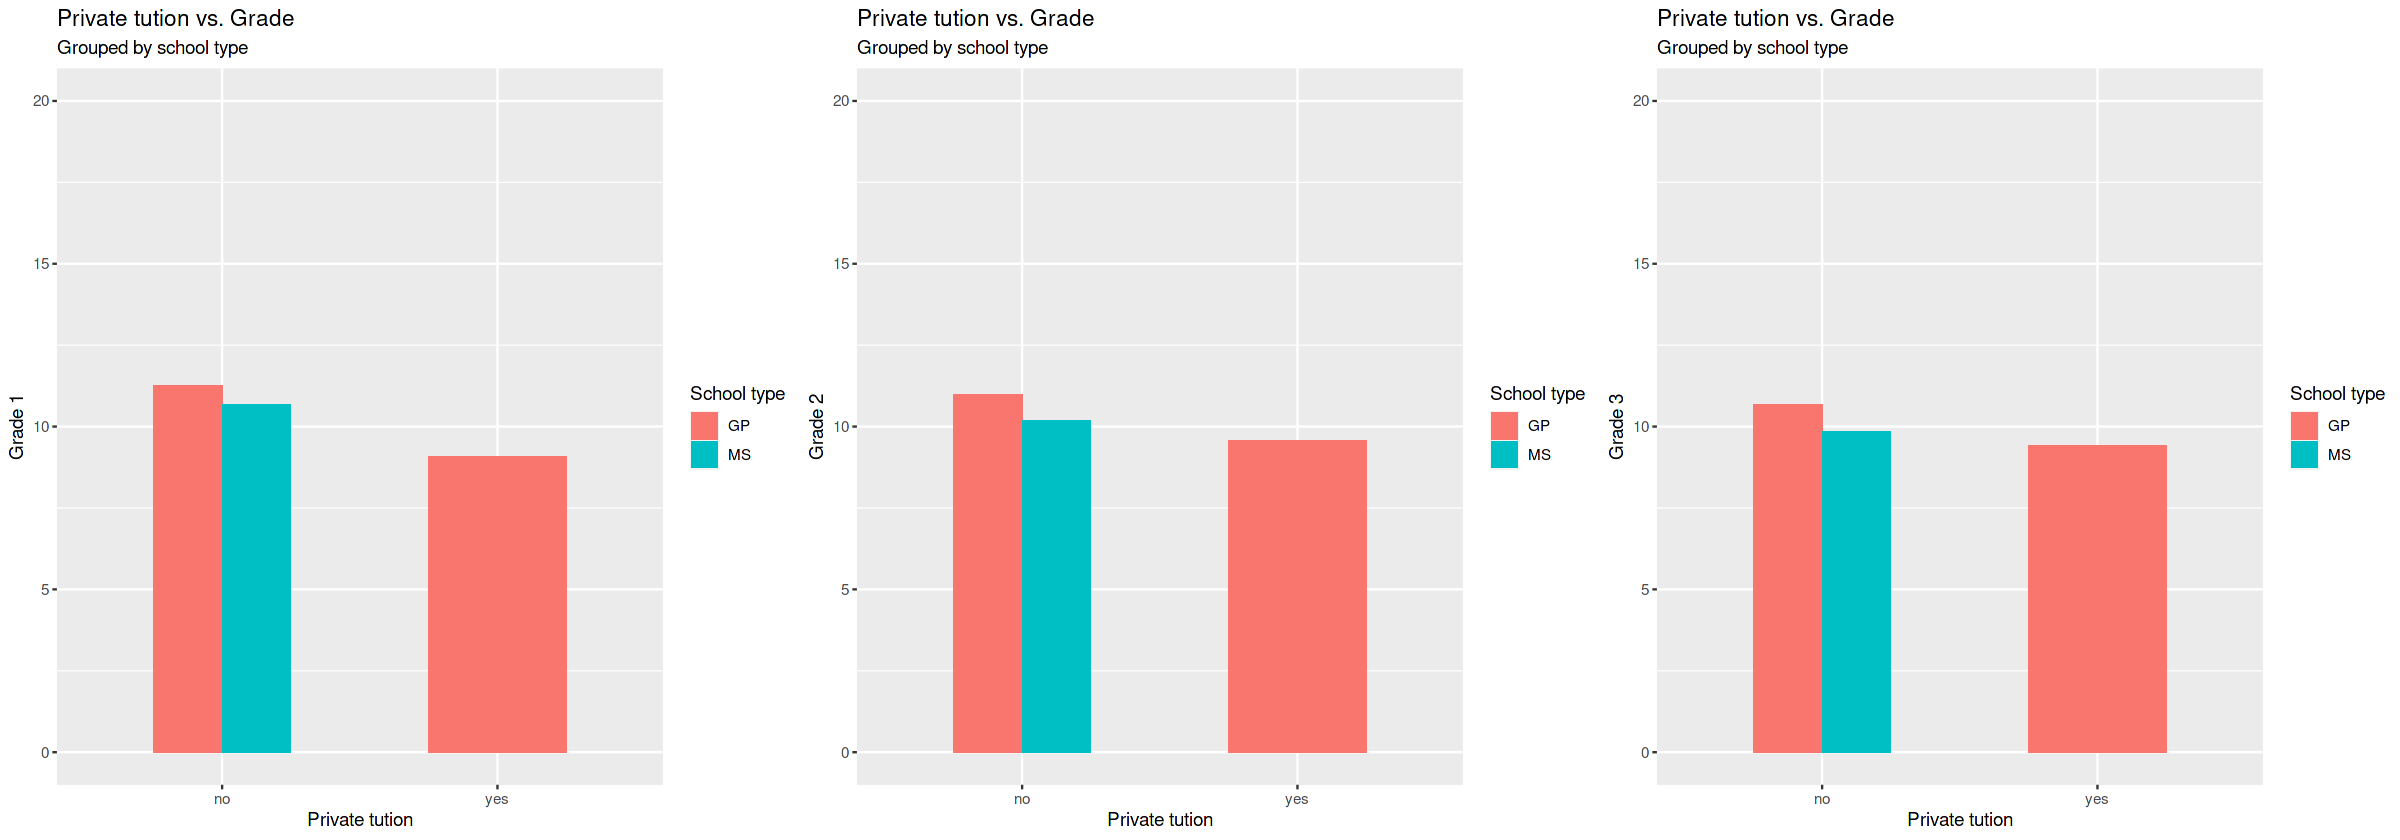

In [10]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school, private_tution = schoolsup) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) ) %>%
arrange(school, desc(private_tution))

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, schoolsup) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = schoolsup, y = avarage_grade_1, fill = school)) +
labs(title = 'Private tution vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Private tution', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, schoolsup) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = schoolsup, y = avarage_grade_2, fill = school)) +
labs(title = 'Private tution vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Private tution', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3 data represented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, schoolsup) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x = schoolsup, y = avarage_grade_3, fill = school)) +
labs(title = 'Private tution vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Private tution', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* Students of GP performed better who didn't took private tution and.
* No student from MS took private tution and has grade more than GP students who took private tution and less than of GP students who didn't took private tution.

#### Relation between family education support and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,family_education_support,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
GP,no,125,11.43200,11.224000,10.864000
GP,yes,224,10.66518,10.535714,10.281250
MS,no,28,10.50000,9.964286,9.642857
MS,yes,18,10.94444,10.555556,10.166667


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


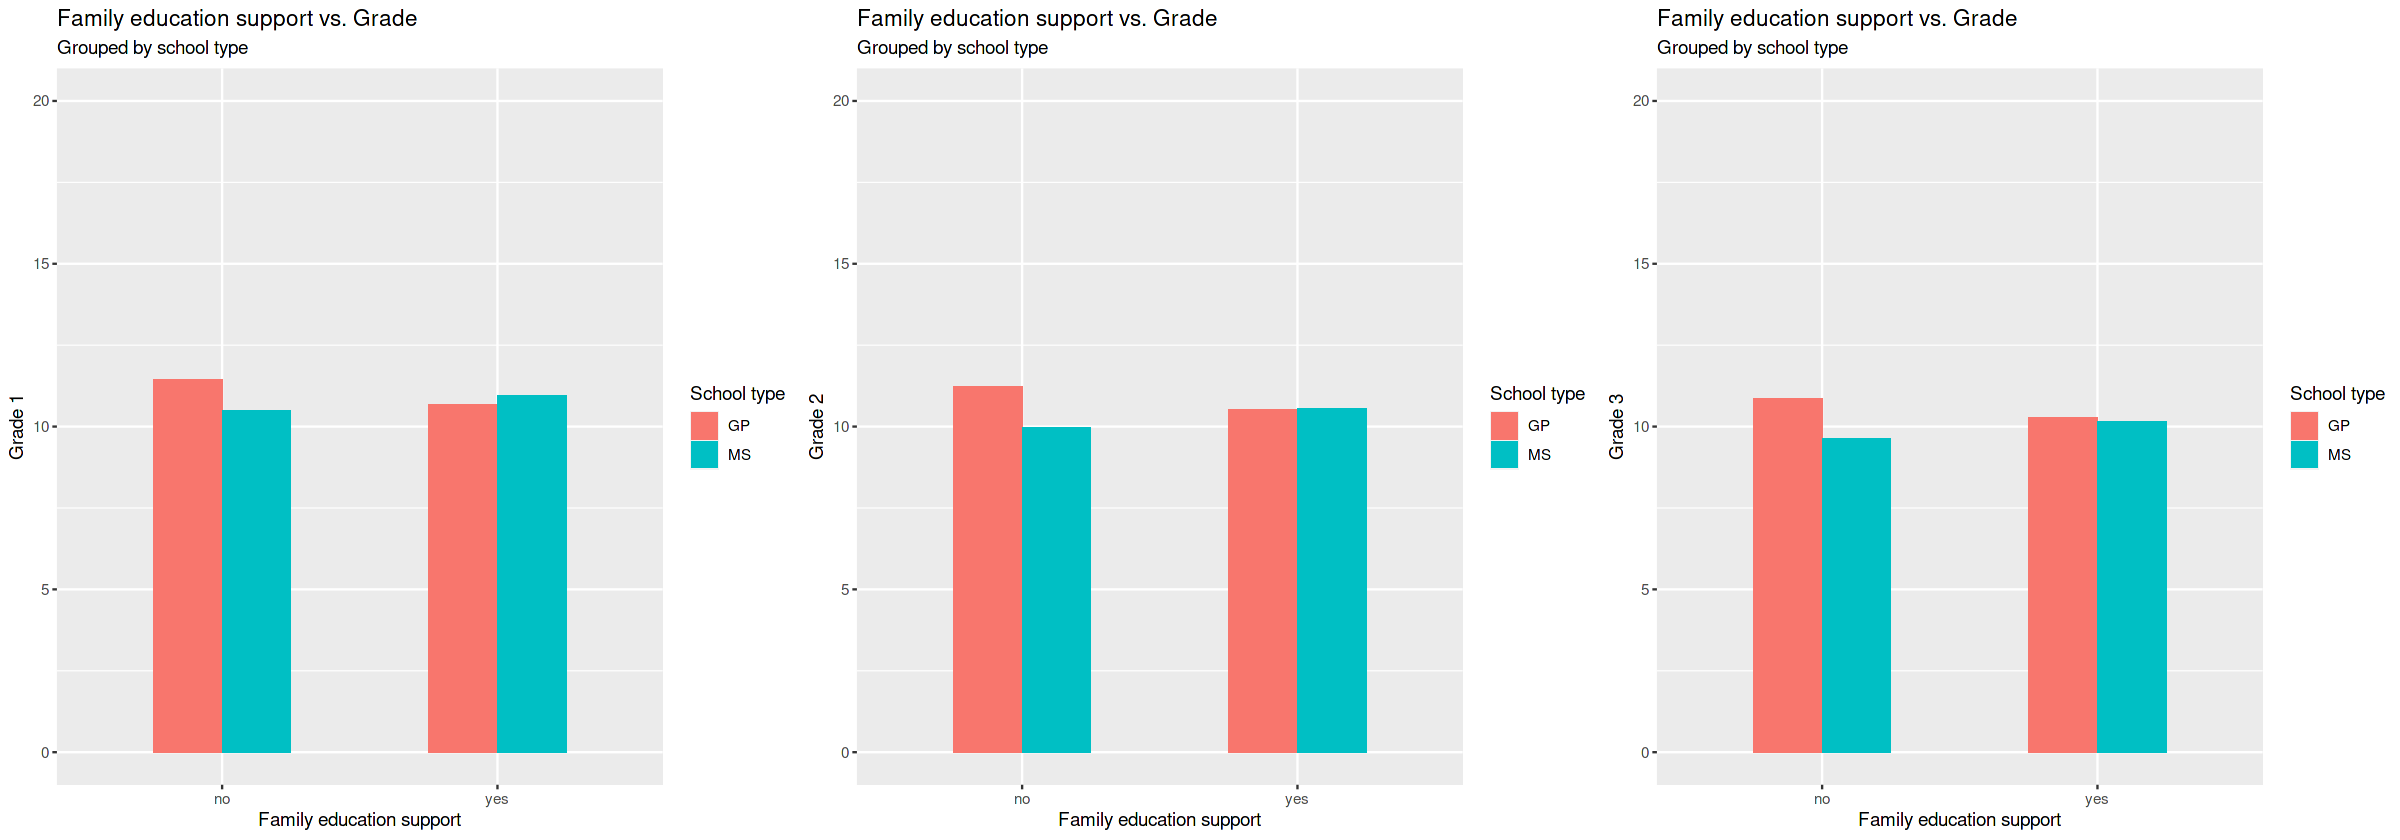

In [11]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school,family_education_support = famsup) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, famsup) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = famsup, y = avarage_grade_1, fill = school)) +
labs(title = 'Family education support vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Family education support', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, famsup) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = famsup, y = avarage_grade_2, fill = school)) +
labs(title = 'Family education support vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Family education support', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3 data represented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, famsup) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x = famsup, y = avarage_grade_3, fill = school)) +
labs(title = 'Family education support vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Family education support', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* Students of GP did better with no education support.
* Students of MS did better with education support.

#### Relation between extra paid classes and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,Extra_paid_classes,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
GP,no,188,10.86170,10.425532,10.074468
GP,yes,161,11.03106,11.198758,10.975155
MS,no,26,10.26923,9.807692,9.346154
MS,yes,20,11.20000,10.700000,10.500000


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


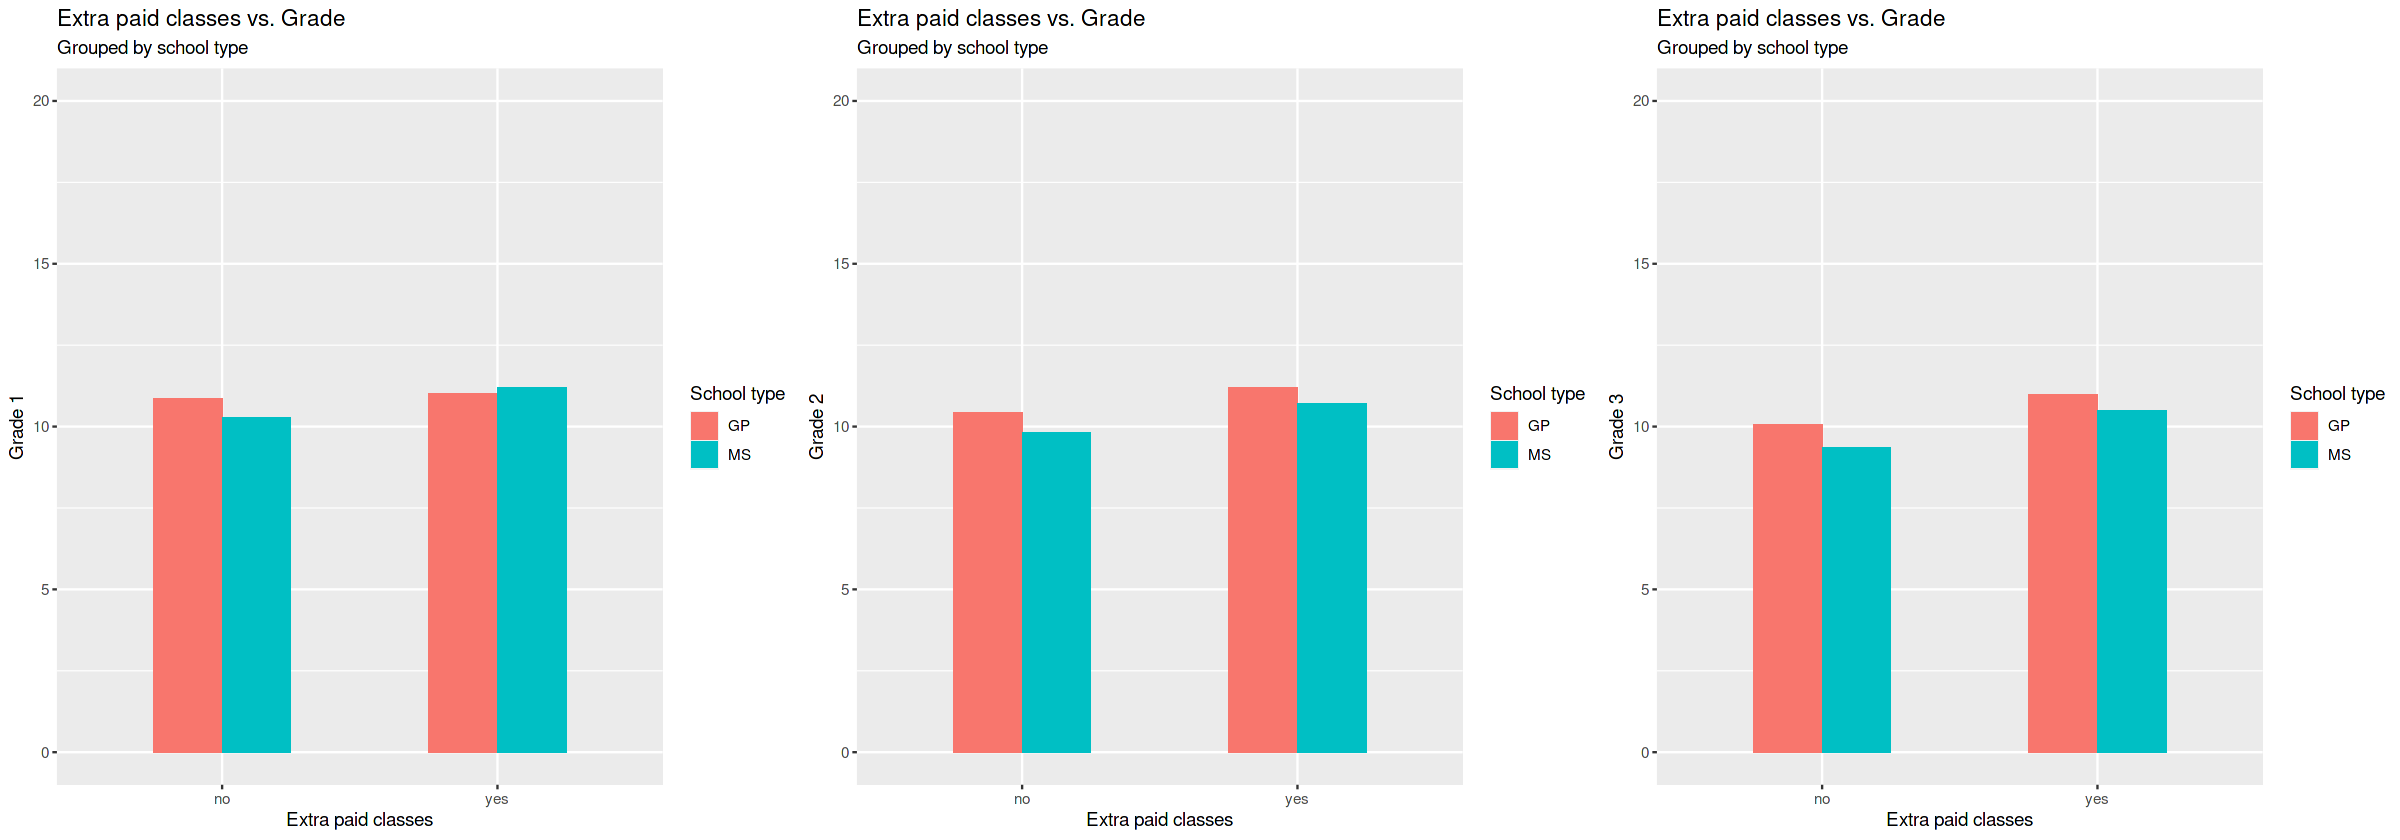

In [12]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school,Extra_paid_classes = paid) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, paid) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = paid, y = avarage_grade_1, fill = school)) +
labs(title = 'Extra paid classes vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Extra paid classes', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, paid) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = paid, y = avarage_grade_2, fill = school)) +
labs(title = 'Extra paid classes vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Extra paid classes', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3 data represented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, paid) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x = paid, y = avarage_grade_3, fill = school)) +
labs(title = 'Extra paid classes vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Extra paid classes', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* Student of GP did better who attend extra paid classes.
* Students of MS did better who attend extra paid classes.

#### Relation between activities and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,activities,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
GP,no,164,10.68293,10.50610,10.35366
GP,yes,185,11.16757,11.02703,10.61081
MS,no,30,10.90000,10.60000,10.26667
MS,yes,16,10.25000,9.43750,9.06250


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


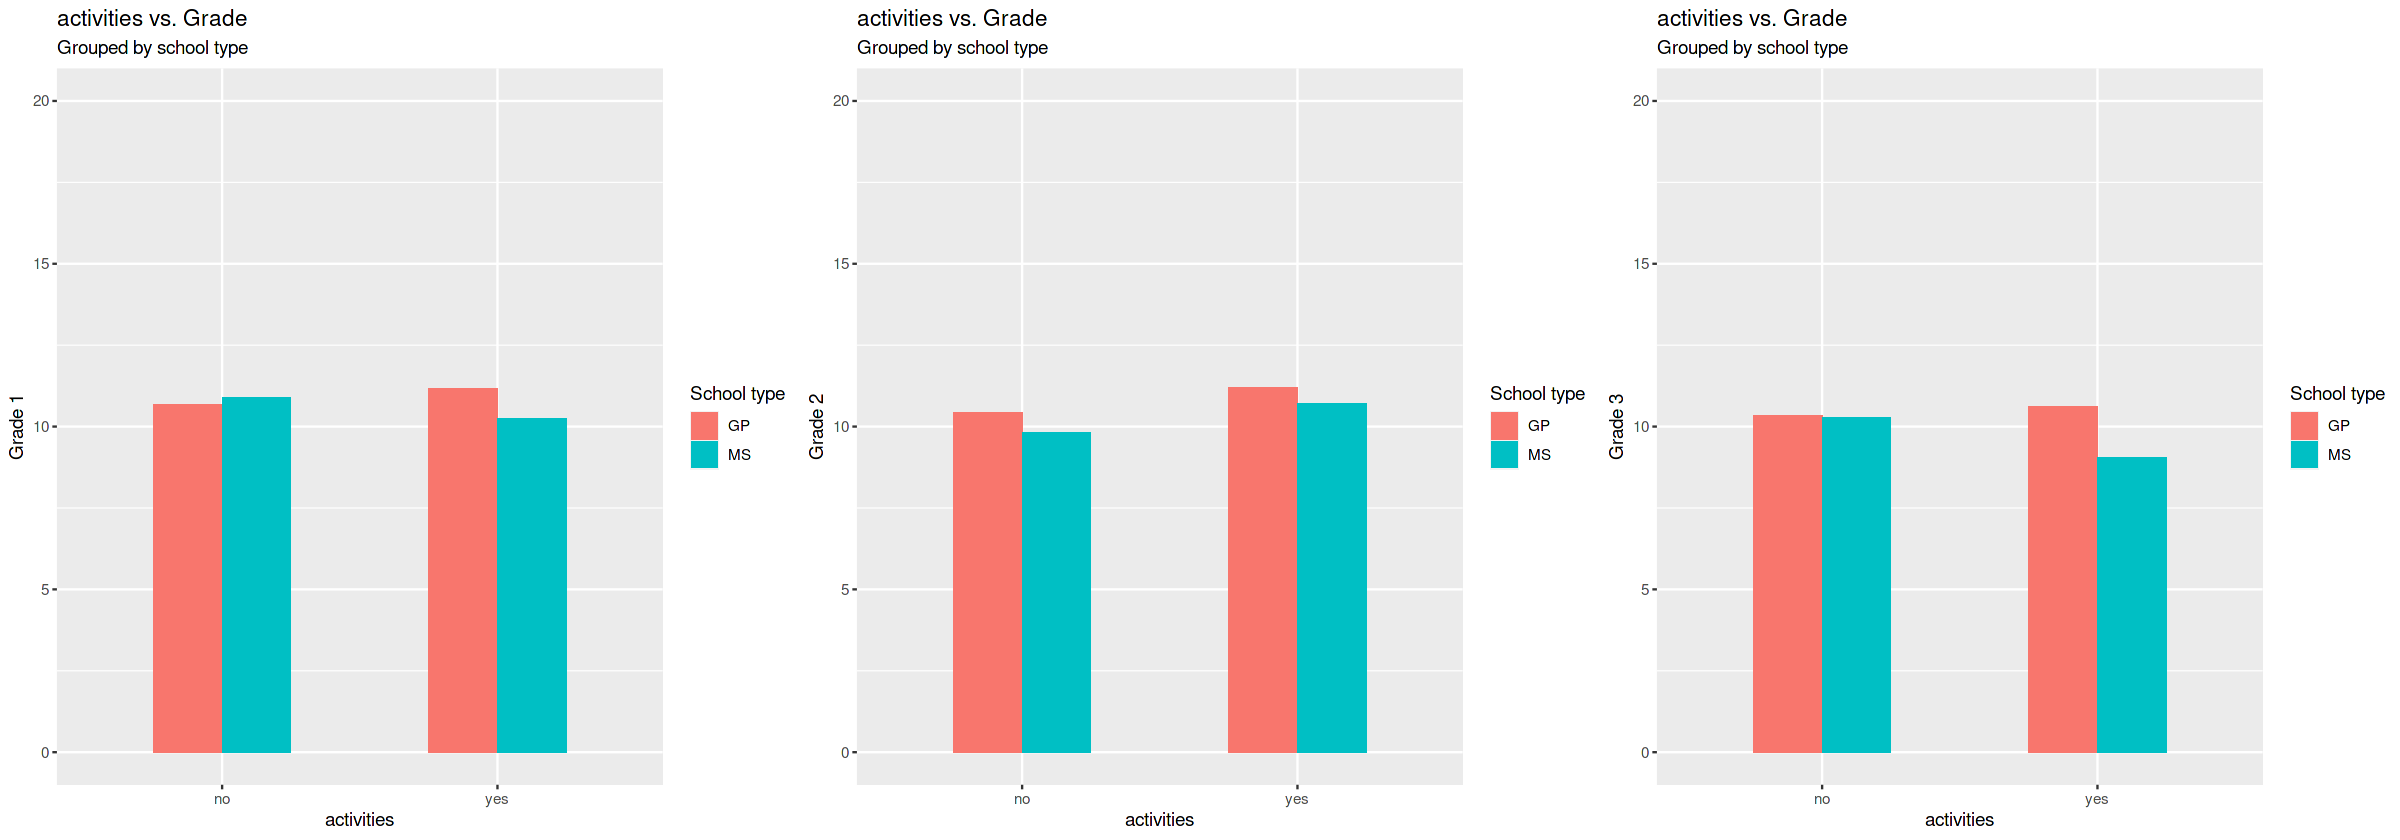

In [13]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school, activities) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, activities) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = activities, y = avarage_grade_1, fill = school)) +
labs(title = 'activities vs. Grade',subtitle = 'Grouped by school type', 
     x = 'activities', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, paid) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = paid, y = avarage_grade_2, fill = school)) +
labs(title = 'activities vs. Grade',subtitle = 'Grouped by school type', 
     x = 'activities', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3 data represented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, activities) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x =activities, y = avarage_grade_3, fill = school)) +
labs(title = 'activities vs. Grade',subtitle = 'Grouped by school type', 
     x = 'activities', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* For students of GP has better grade who are involve in activities.
* For students of MS the avarage grades of 3 terms are random.

#### Relation between higher education and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,want_to_take_higher_education,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
GP,no,17,7.764706,7.352941,6.117647
GP,yes,332,11.102410,10.957831,10.713855
MS,no,3,11.666667,10.333333,10.666667
MS,yes,43,10.604651,10.186047,9.790698


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


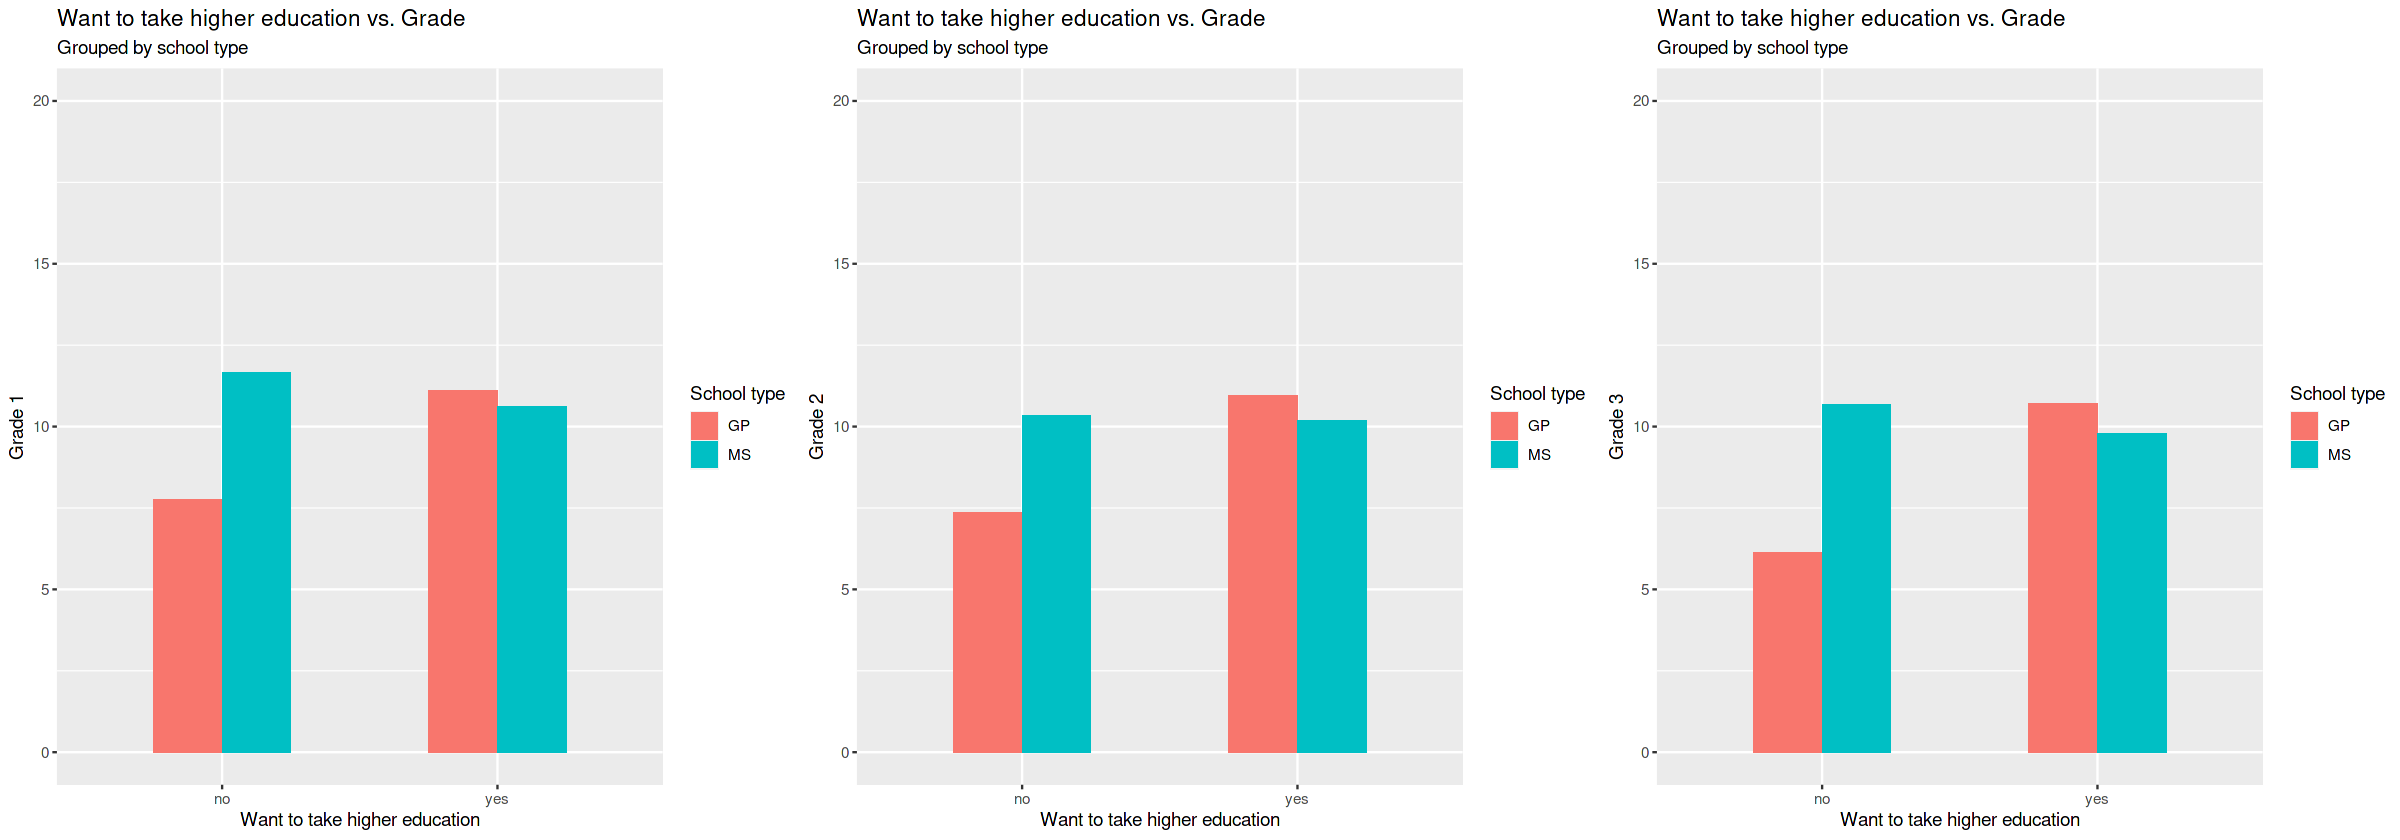

In [14]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school,want_to_take_higher_education = higher) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, higher) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = higher, y = avarage_grade_1, fill = school)) +
labs(title = 'Want to take higher education vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Want to take higher education', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, higher) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = higher, y = avarage_grade_2, fill = school)) +
labs(title = 'Want to take higher education vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Want to take higher education', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3 data represented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, higher) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x = higher, y = avarage_grade_3, fill = school)) +
labs(title = 'Want to take higher education vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Want to take higher education', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* Students of GP who wants to take higher education has better grade than those who doesn't want to take higher education.
* Students of MS who doesn't want to take higher education, did better.

#### Relation between internet connection and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,internet_connection,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
GP,no,52,10.538462,9.903846,9.673077
GP,yes,297,11.010101,10.936027,10.632997
MS,no,14,9.785714,9.000000,8.428571
MS,yes,32,11.062500,10.718750,10.468750


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


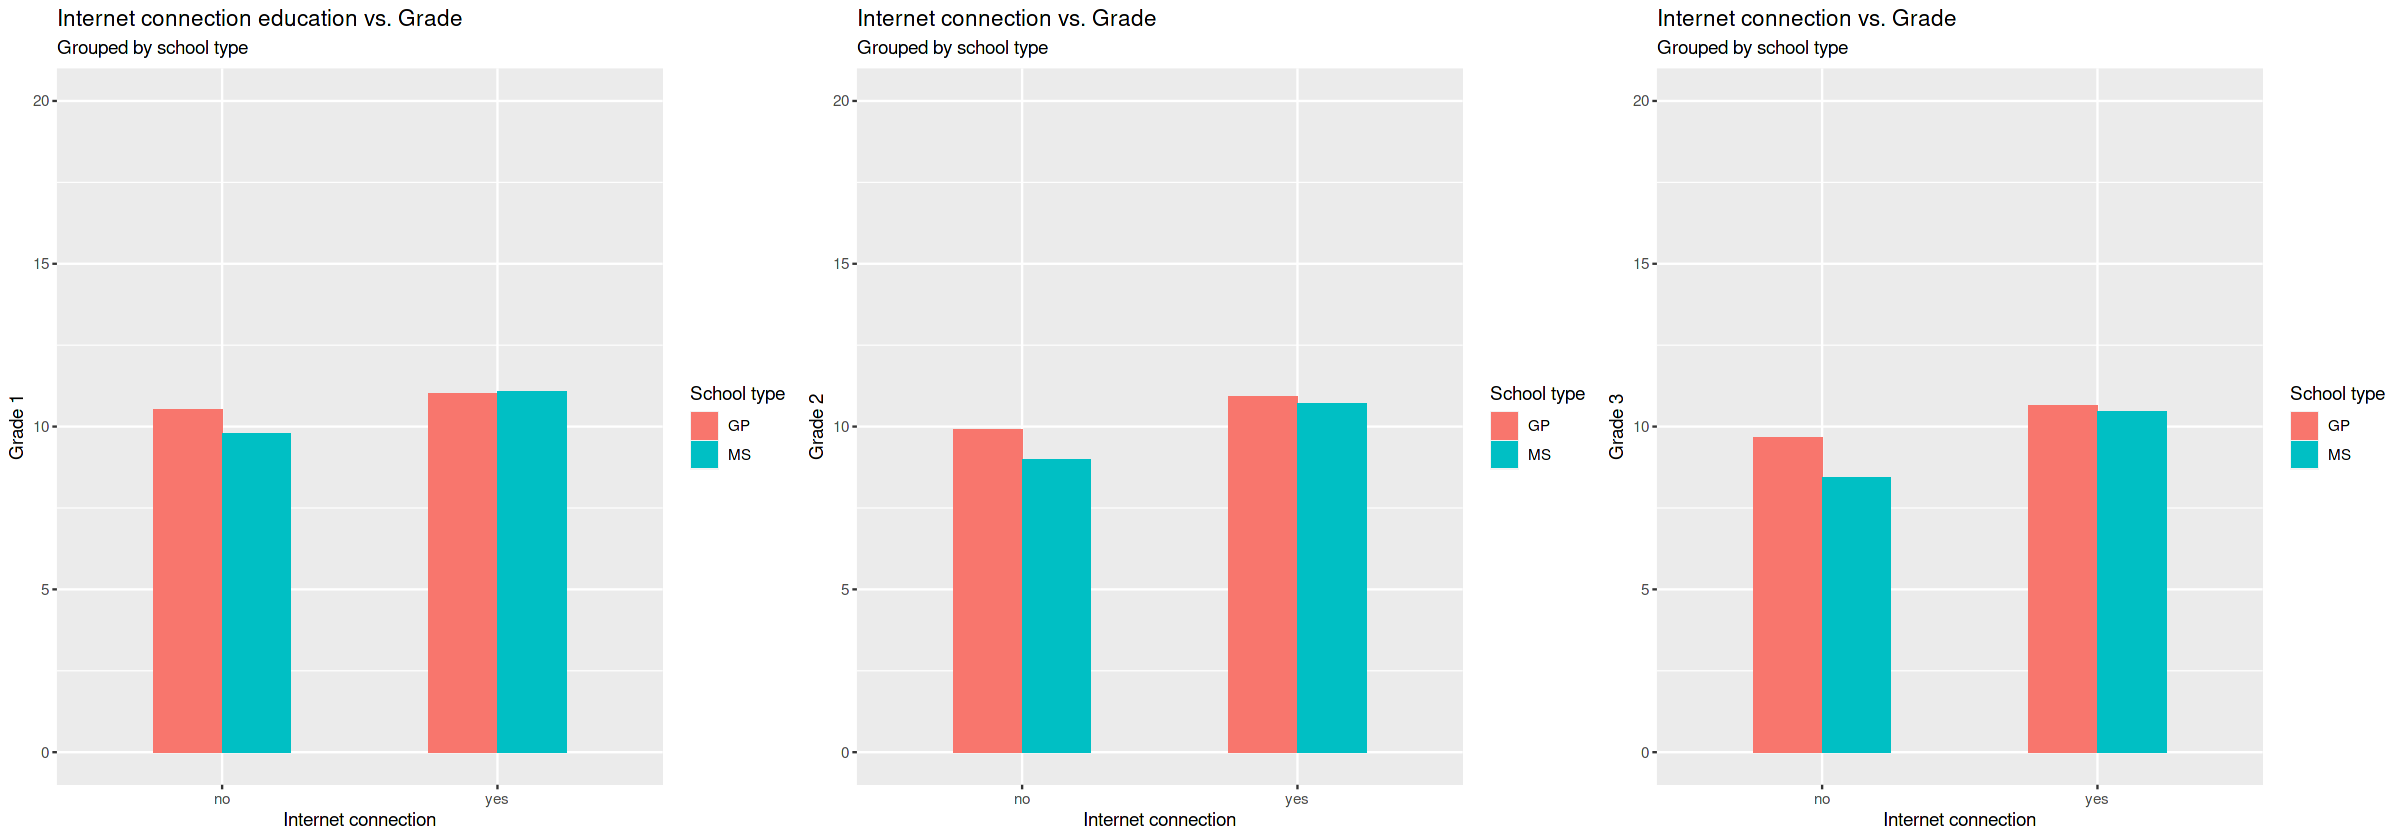

In [15]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school,internet_connection = internet) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, internet) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = internet, y = avarage_grade_1, fill = school)) +
labs(title = 'Internet connection education vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Internet connection', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, internet) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = internet, y = avarage_grade_2, fill = school)) +
labs(title = 'Internet connection vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Internet connection', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3/final grade data reprented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, internet) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x = internet, y = avarage_grade_3, fill = school)) +
labs(title = 'Internet connection vs. Grade',subtitle = 'Grouped by school type', 
     x = 'Internet connection', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* For both school students those who have internet connection did better grade.

#### Relation between family relationship and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,family_relationship,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
GP,1,6,11.33333,12.500000,12.333333
GP,2,15,10.73333,10.533333,8.933333
GP,3,59,10.55932,10.661017,10.033898
GP,4,176,11.01136,10.727273,10.403409
GP,5,93,11.05376,10.892473,11.075269
MS,1,2,9.00000,8.500000,5.500000
MS,2,3,13.66667,14.666667,14.666667
MS,3,9,10.55556,9.888889,10.111111
MS,4,19,10.47368,10.210526,9.947368


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


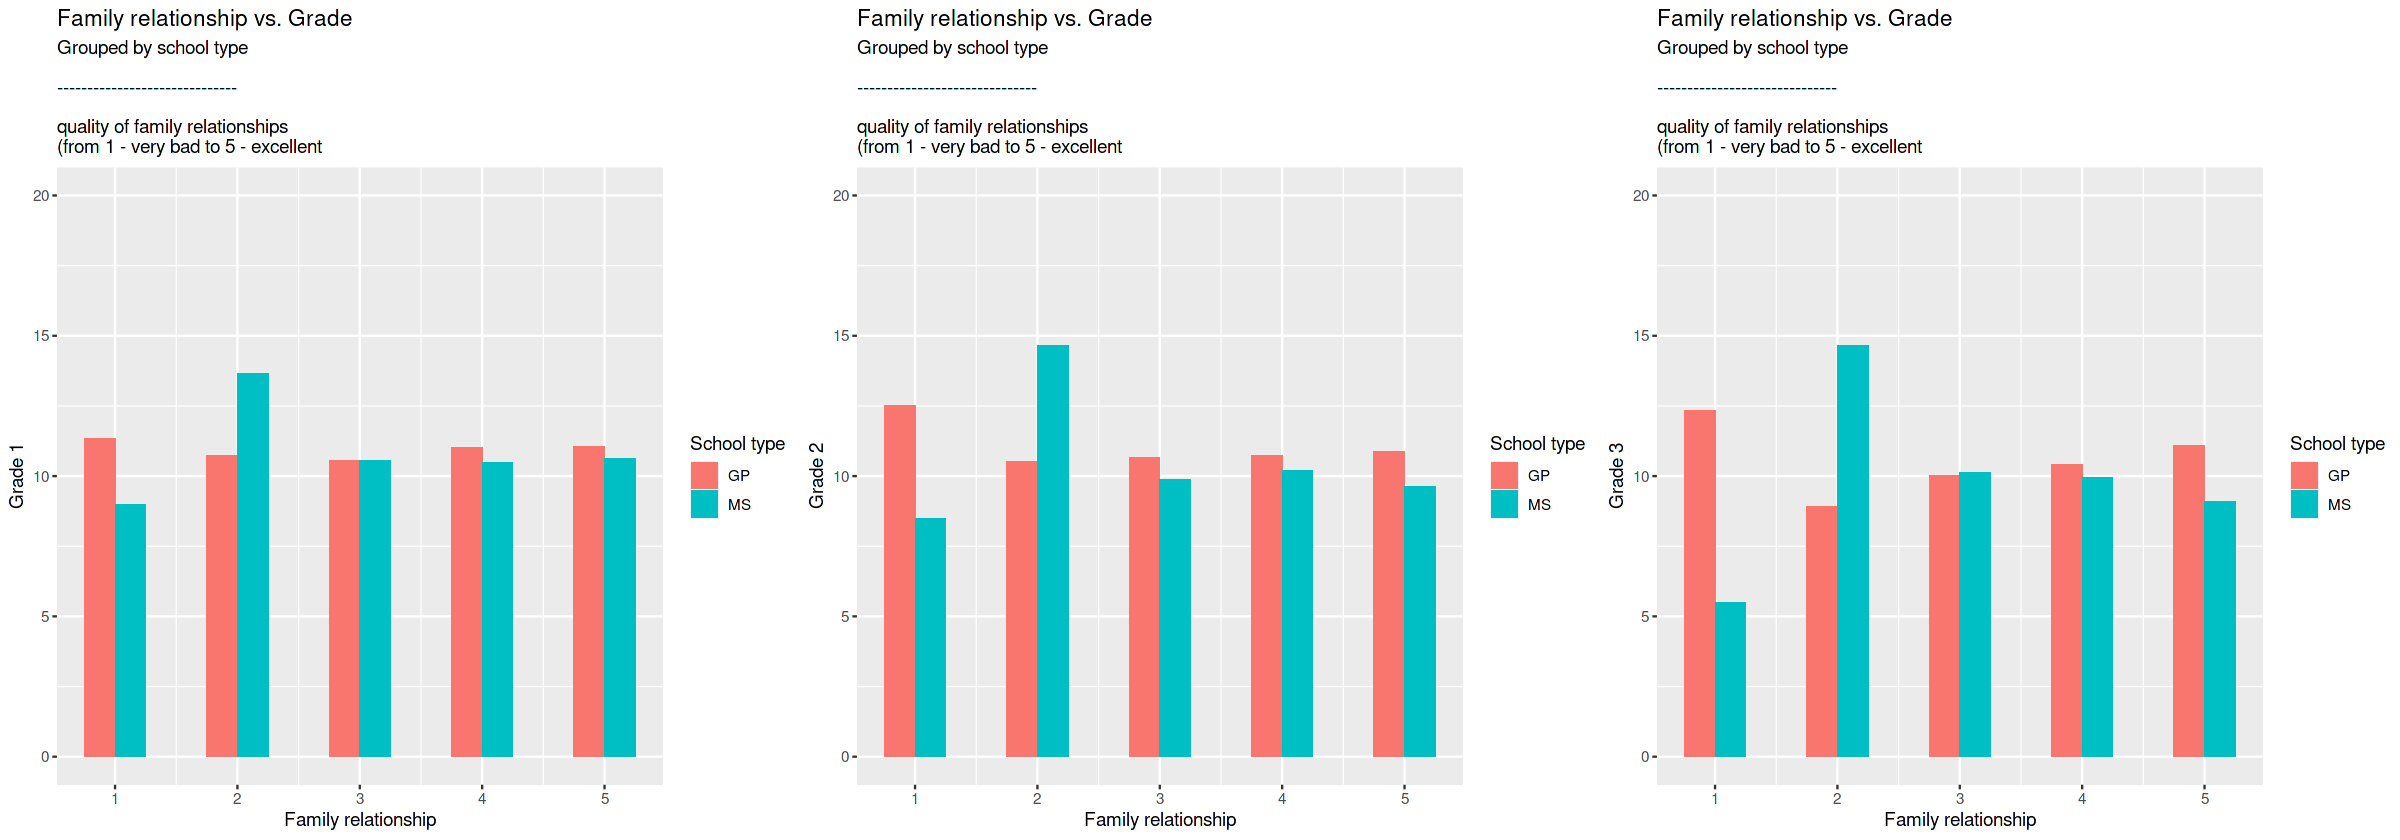

In [16]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school,family_relationship = famrel) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, famrel) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = famrel, y = avarage_grade_1, fill = school)) +
labs(title = 'Family relationship vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\nquality of family relationships
(from 1 - very bad to 5 - excellent', 
     x = 'Family relationship', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, famrel) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = famrel, y = avarage_grade_2, fill = school)) +
labs(title = 'Family relationship vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\nquality of family relationships
(from 1 - very bad to 5 - excellent', 
     x = 'Family relationship', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3/final grade data reprented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, famrel) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x = famrel, y = avarage_grade_3, fill = school)) +
labs(title = 'Family relationship vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\nquality of family relationships
(from 1 - very bad to 5 - excellent', 
     x = 'Family relationship', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* Students of GP have on avarage same grade for all type of family relationship quality allthough, students who have type one relationship quality, did better than others.
* Students of MS who has relationship quality level as 2 did best and whose who has quality level as 1 did most bad.

#### Relation between free time and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,free_time,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
GP,1,17,10.11765,10.470588,10.117647
GP,2,55,12.21818,11.945455,11.836364
GP,3,143,10.31469,10.258741,9.734266
GP,4,101,10.89109,10.653465,10.514851
GP,5,33,12.09091,11.666667,11.636364
MS,1,2,10.50000,10.000000,7.500000
MS,2,9,11.00000,10.444444,9.888889
MS,3,14,10.92857,10.500000,10.285714
MS,4,14,10.42857,9.928571,9.785714


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


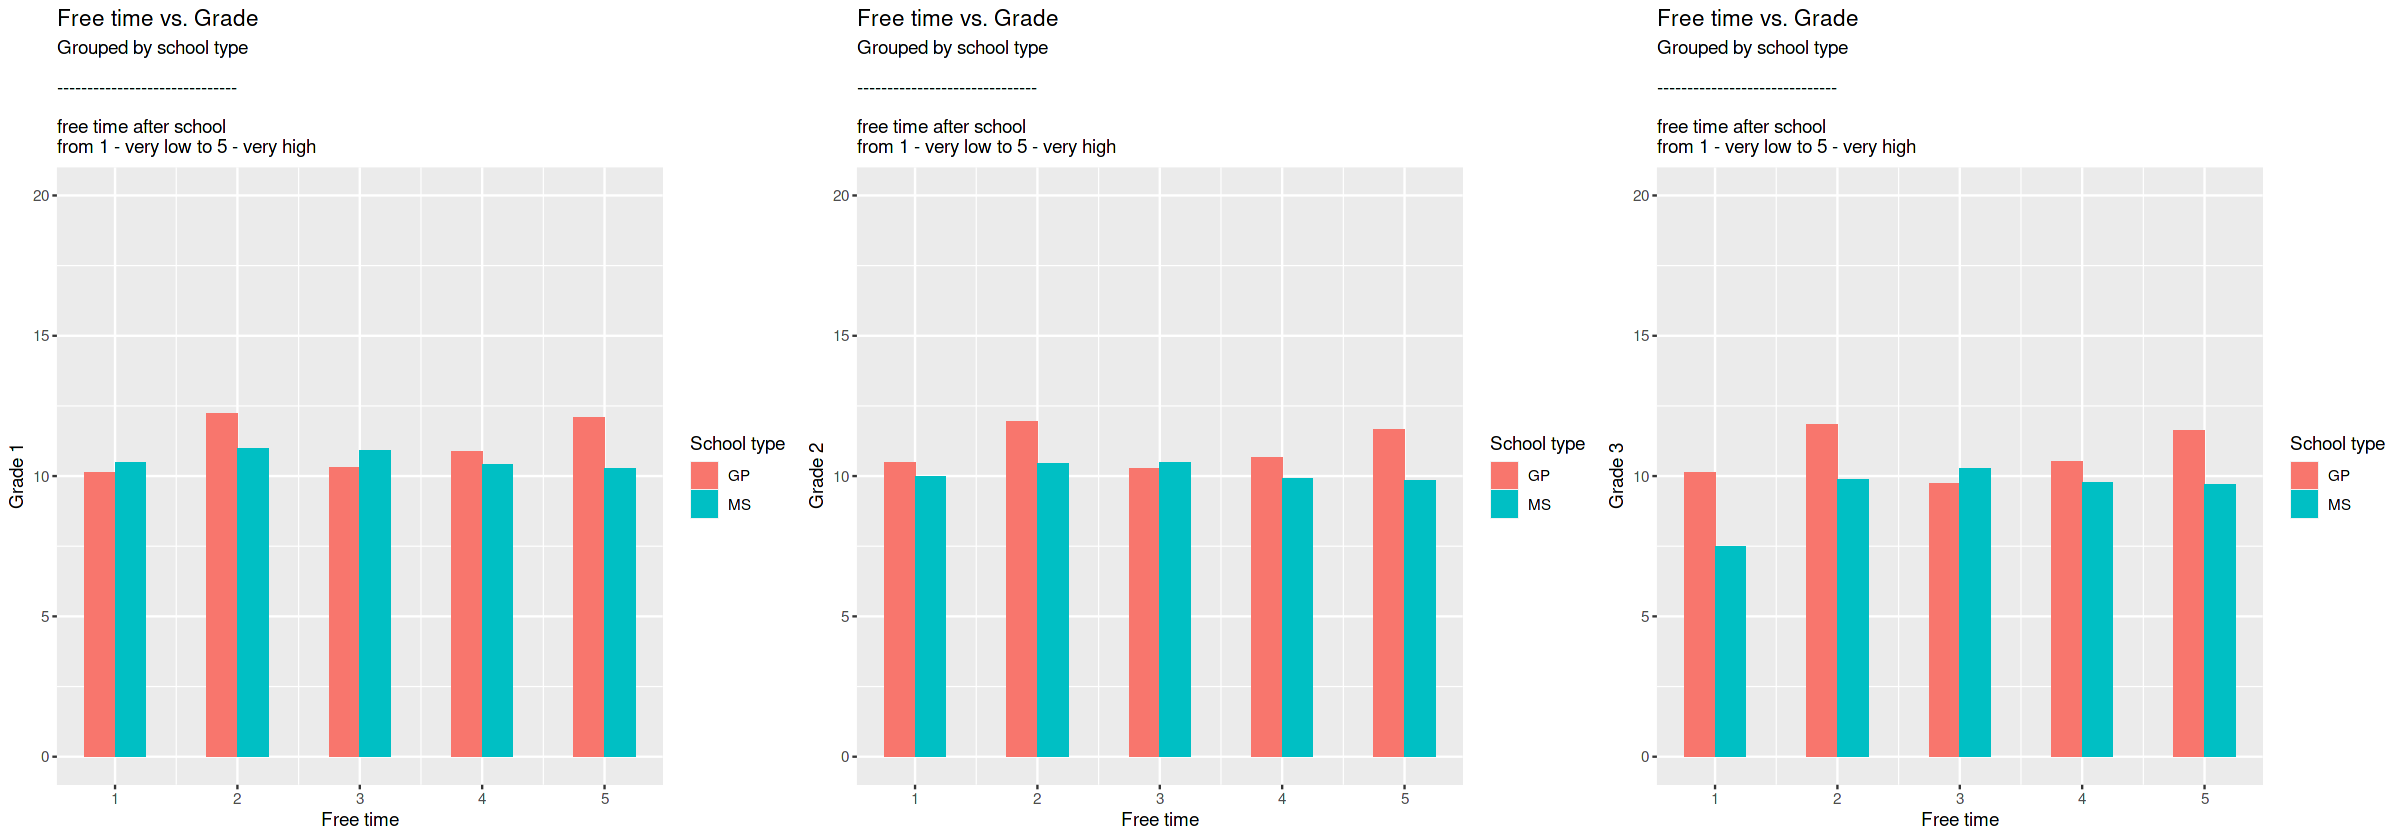

In [17]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school,free_time = freetime) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, freetime) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = freetime, y = avarage_grade_1, fill = school)) +
labs(title = 'Free time vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\nfree time after school 
from 1 - very low to 5 - very high', 
     x = 'Free time', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, freetime) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = freetime, y = avarage_grade_2, fill = school)) +
labs(title = 'Free time vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\nfree time after school 
from 1 - very low to 5 - very high', 
     x = 'Free time', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3/final grade data reprented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, freetime) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x = freetime, y = avarage_grade_3, fill = school)) +
labs(title = 'Free time vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\nfree time after school 
from 1 - very low to 5 - very high', 
     x = 'Free time', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* Students of GP who has free time level as 2 and 5 did best.
* Students of MS seems to have same range of grade. Allthough, for final exam students who has type one free time performed lower grade than others.

#### Relation between going out and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,going_out,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
GP,1,20,11.600000,11.250000,10.850000
GP,2,93,11.451613,11.634409,11.419355
GP,3,113,11.389381,11.230088,11.097345
GP,4,74,10.256757,9.864865,9.378378
GP,5,49,9.693878,9.326531,8.857143
MS,1,3,8.000000,7.666667,3.333333
MS,2,10,10.600000,9.800000,9.100000
MS,3,17,10.529412,9.882353,10.058824
MS,4,12,11.500000,11.250000,11.333333


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


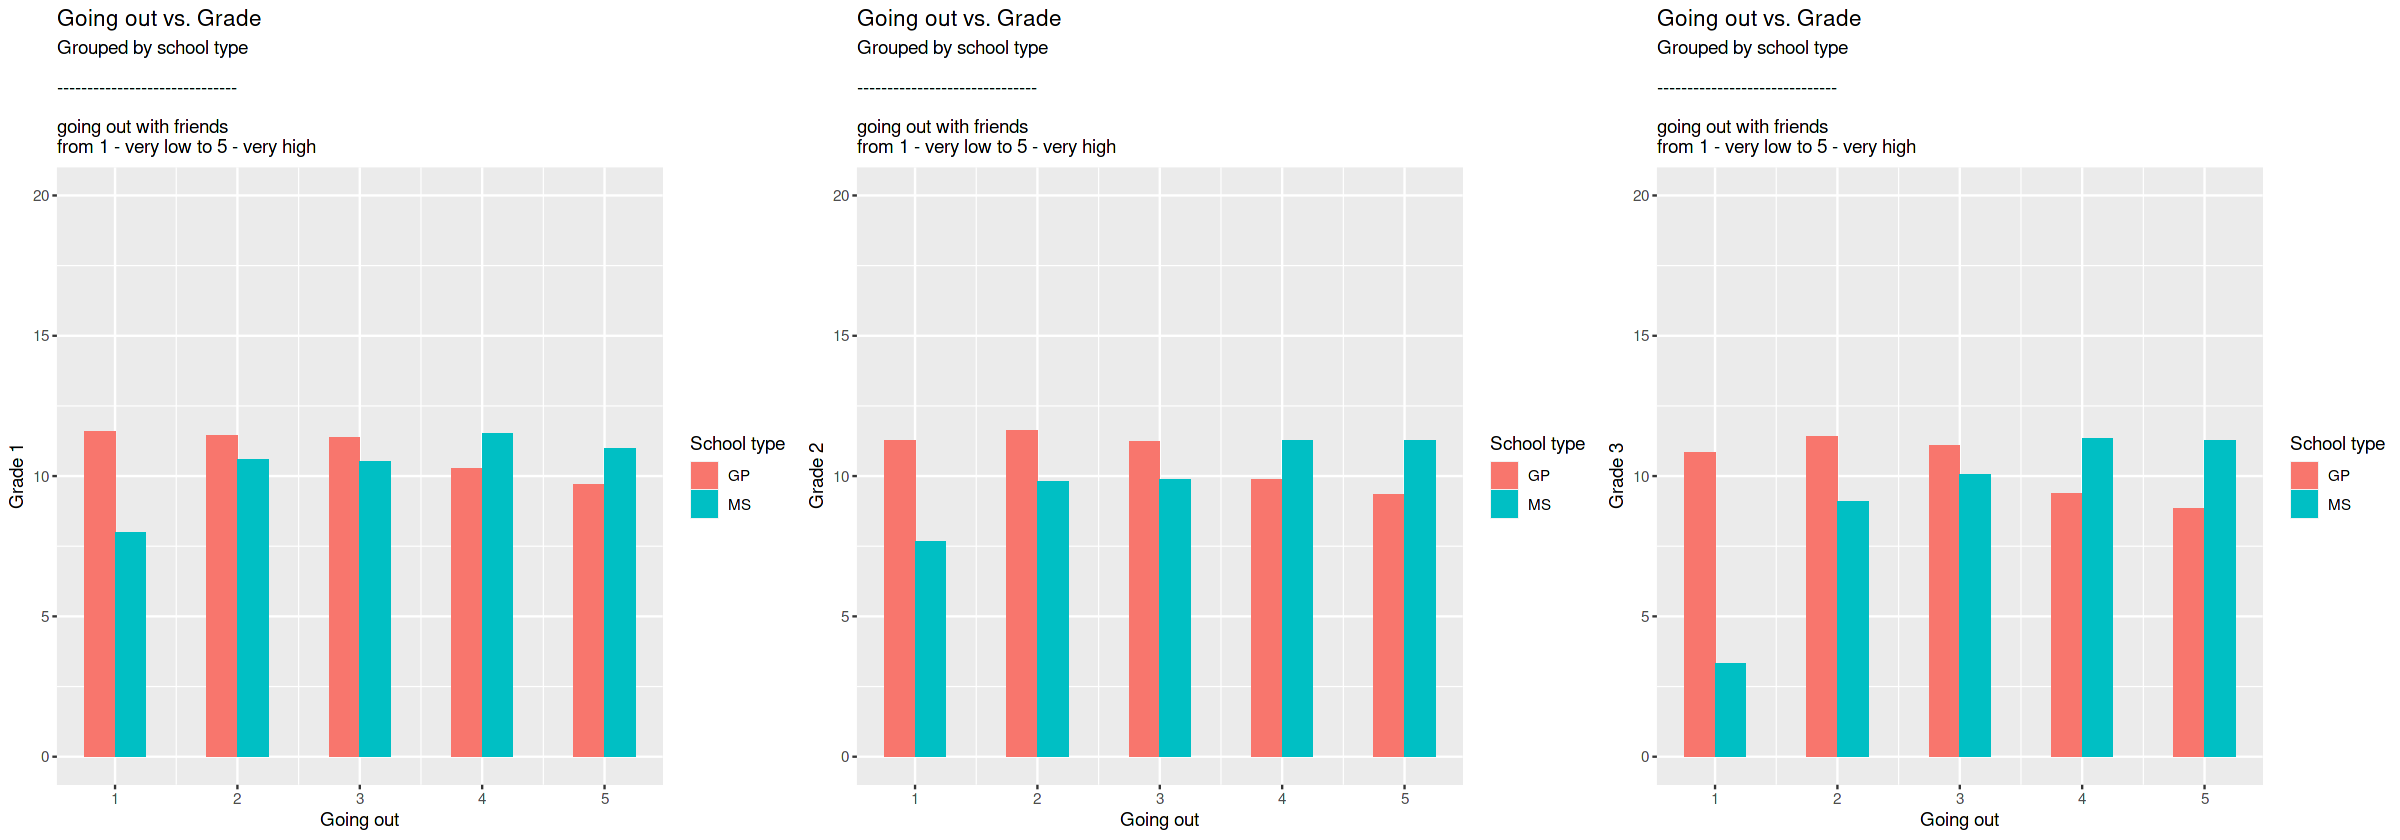

In [18]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school, going_out = goout) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, goout) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = goout, y = avarage_grade_1, fill = school)) +
labs(title = 'Going out vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\ngoing out with friends 
from 1 - very low to 5 - very high', 
     x = 'Going out', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, goout) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = goout, y = avarage_grade_2, fill = school)) +
labs(title = 'Going out vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\ngoing out with friends 
from 1 - very low to 5 - very high', 
     x = 'Going out', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3/final grade data reprented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, goout) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x = goout, y = avarage_grade_3, fill = school)) +
labs(title = 'Going out vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\ngoing out with friends
from 1 - very low to 5 - very high', 
     x = 'Going out', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* Students of GP who goes out with friends on level of 2 and 3 out of 5, tends to do better.
* Students of MS who goes out on level of 4 out of 5, tends to better.

#### Relation between health and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,health,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
GP,1,40,11.75000,12.20000,12.150000
GP,2,40,11.25000,11.07500,10.025000
GP,3,78,10.57692,10.32051,9.987179
GP,4,61,10.68852,10.37705,10.032787
GP,5,130,10.93077,10.72308,10.638462
MS,1,7,11.42857,11.14286,10.285714
MS,2,5,11.60000,11.40000,11.800000
MS,3,13,10.76923,10.00000,10.153846
MS,4,5,11.20000,10.40000,11.000000


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


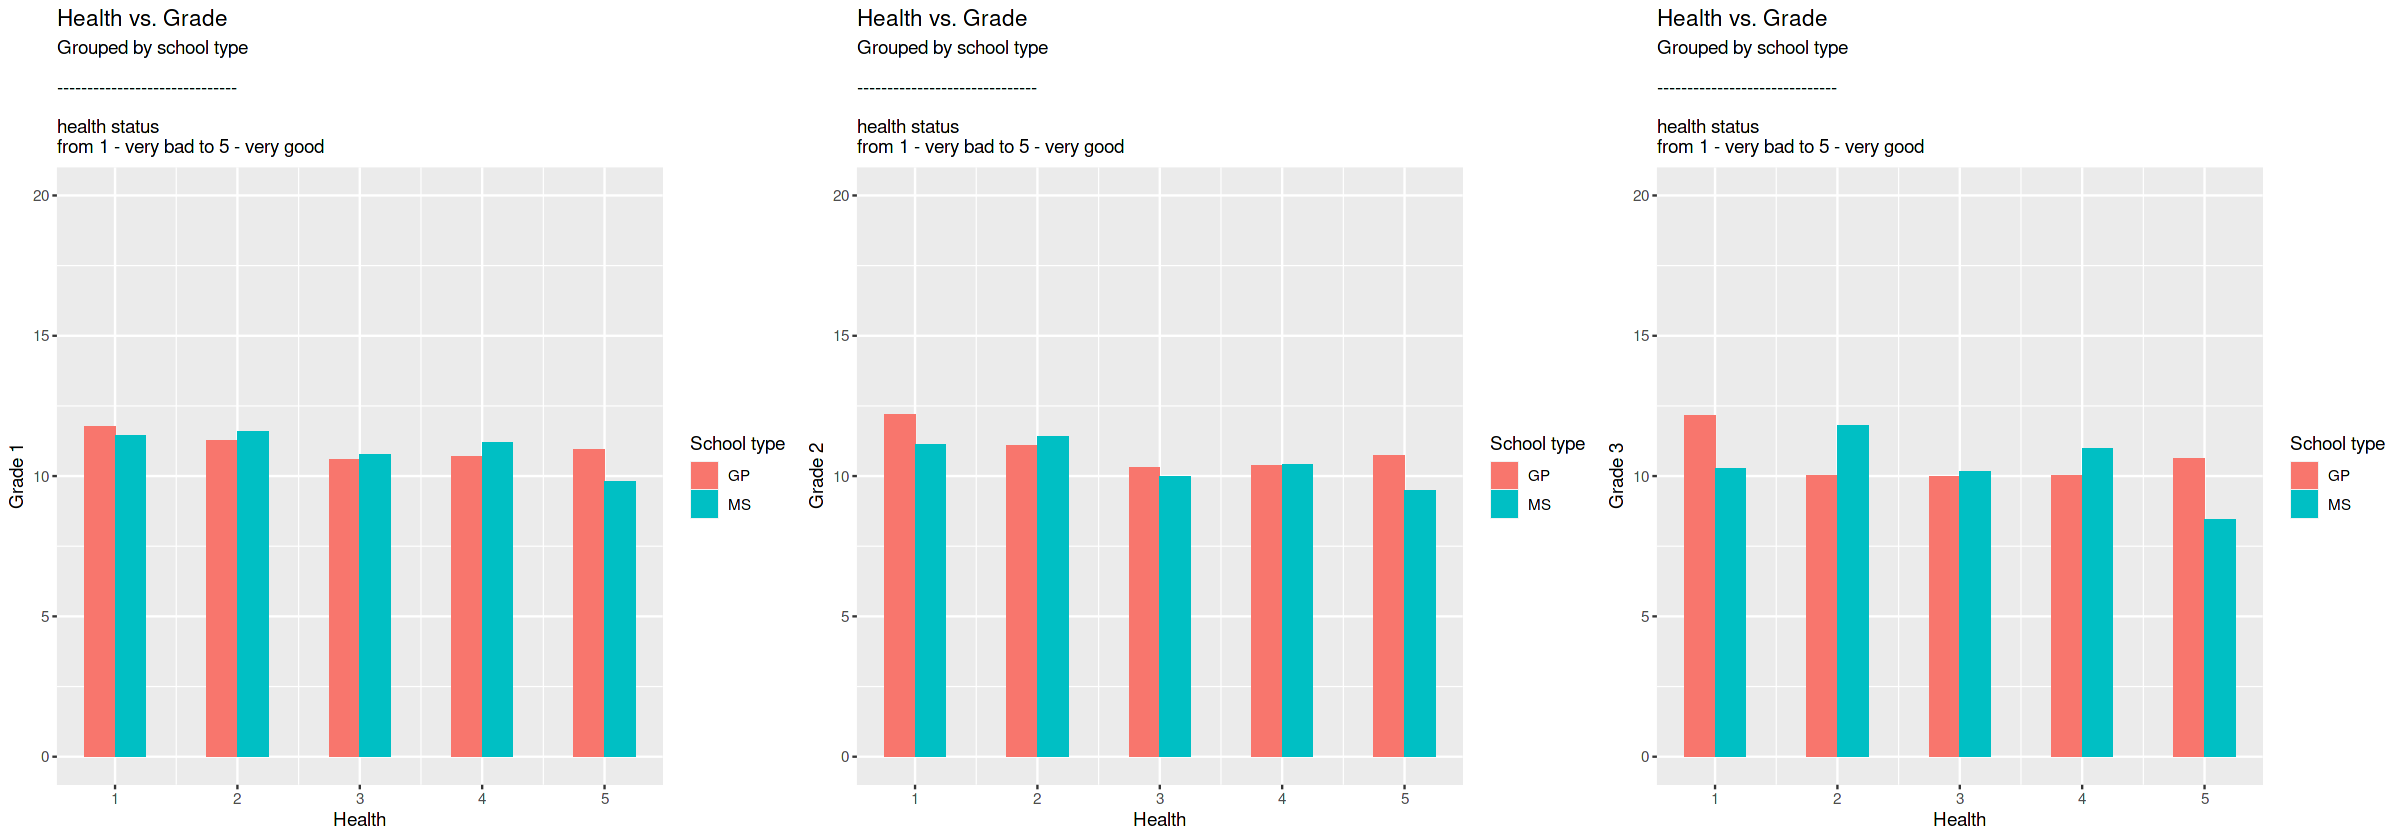

In [19]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school, health ) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =7)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, health) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = health, y = avarage_grade_1, fill = school)) +
labs(title = 'Health vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\nhealth status 
from 1 - very bad to 5 - very good', 
     x = 'Health', y ='Grade 1', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, health) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = health, y = avarage_grade_2, fill = school)) +
labs(title = 'Health vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\nhealth status
from 1 - very bad to 5 - very good', 
     x = 'Health', y ='Grade 2', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Grade 3/final grade data reprented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, health) %>%
summarise(count = n(), avarage_grade_3 = mean(G3) ) %>%
ggplot(aes(x = health, y = avarage_grade_3, fill = school)) +
labs(title = 'Health vs. Grade',subtitle = 'Grouped by school type\n\n------------------------------
\nhealth status
from 1 - very bad to 5 - very good', 
     x = 'Health', y ='Grade 3', fill = 'School type') +
geom_col(width=0.5, position = position_dodge(width=0.5)) +
ylim(0,20)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 3)

* Students of GP seems to have same range of grade despite of having different health condition. Allthough the grade little bit better for those whoes health condition is most bad among all.
* Students of MS seems to have seems to have same range of grade too except health condition level of 2 tends to do perform better.

#### Relation between absences and grade

`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


school,absences,count,avarage_grade_1,avarage_grade_2,avarage_grade_3
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
GP,0,99,10.414141,9.737374,8.292929
GP,1,3,12.333333,12.666667,13.000000
GP,2,59,11.677966,11.898305,12.000000
GP,3,5,10.800000,11.200000,11.400000
GP,4,44,10.818182,11.204545,11.318182
GP,5,3,13.666667,13.333333,14.000000
GP,6,31,10.838710,11.419355,11.774194
GP,7,5,13.200000,13.400000,13.800000
GP,8,20,10.900000,10.600000,10.700000


`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'school'. You can override using the
`.groups` argument.


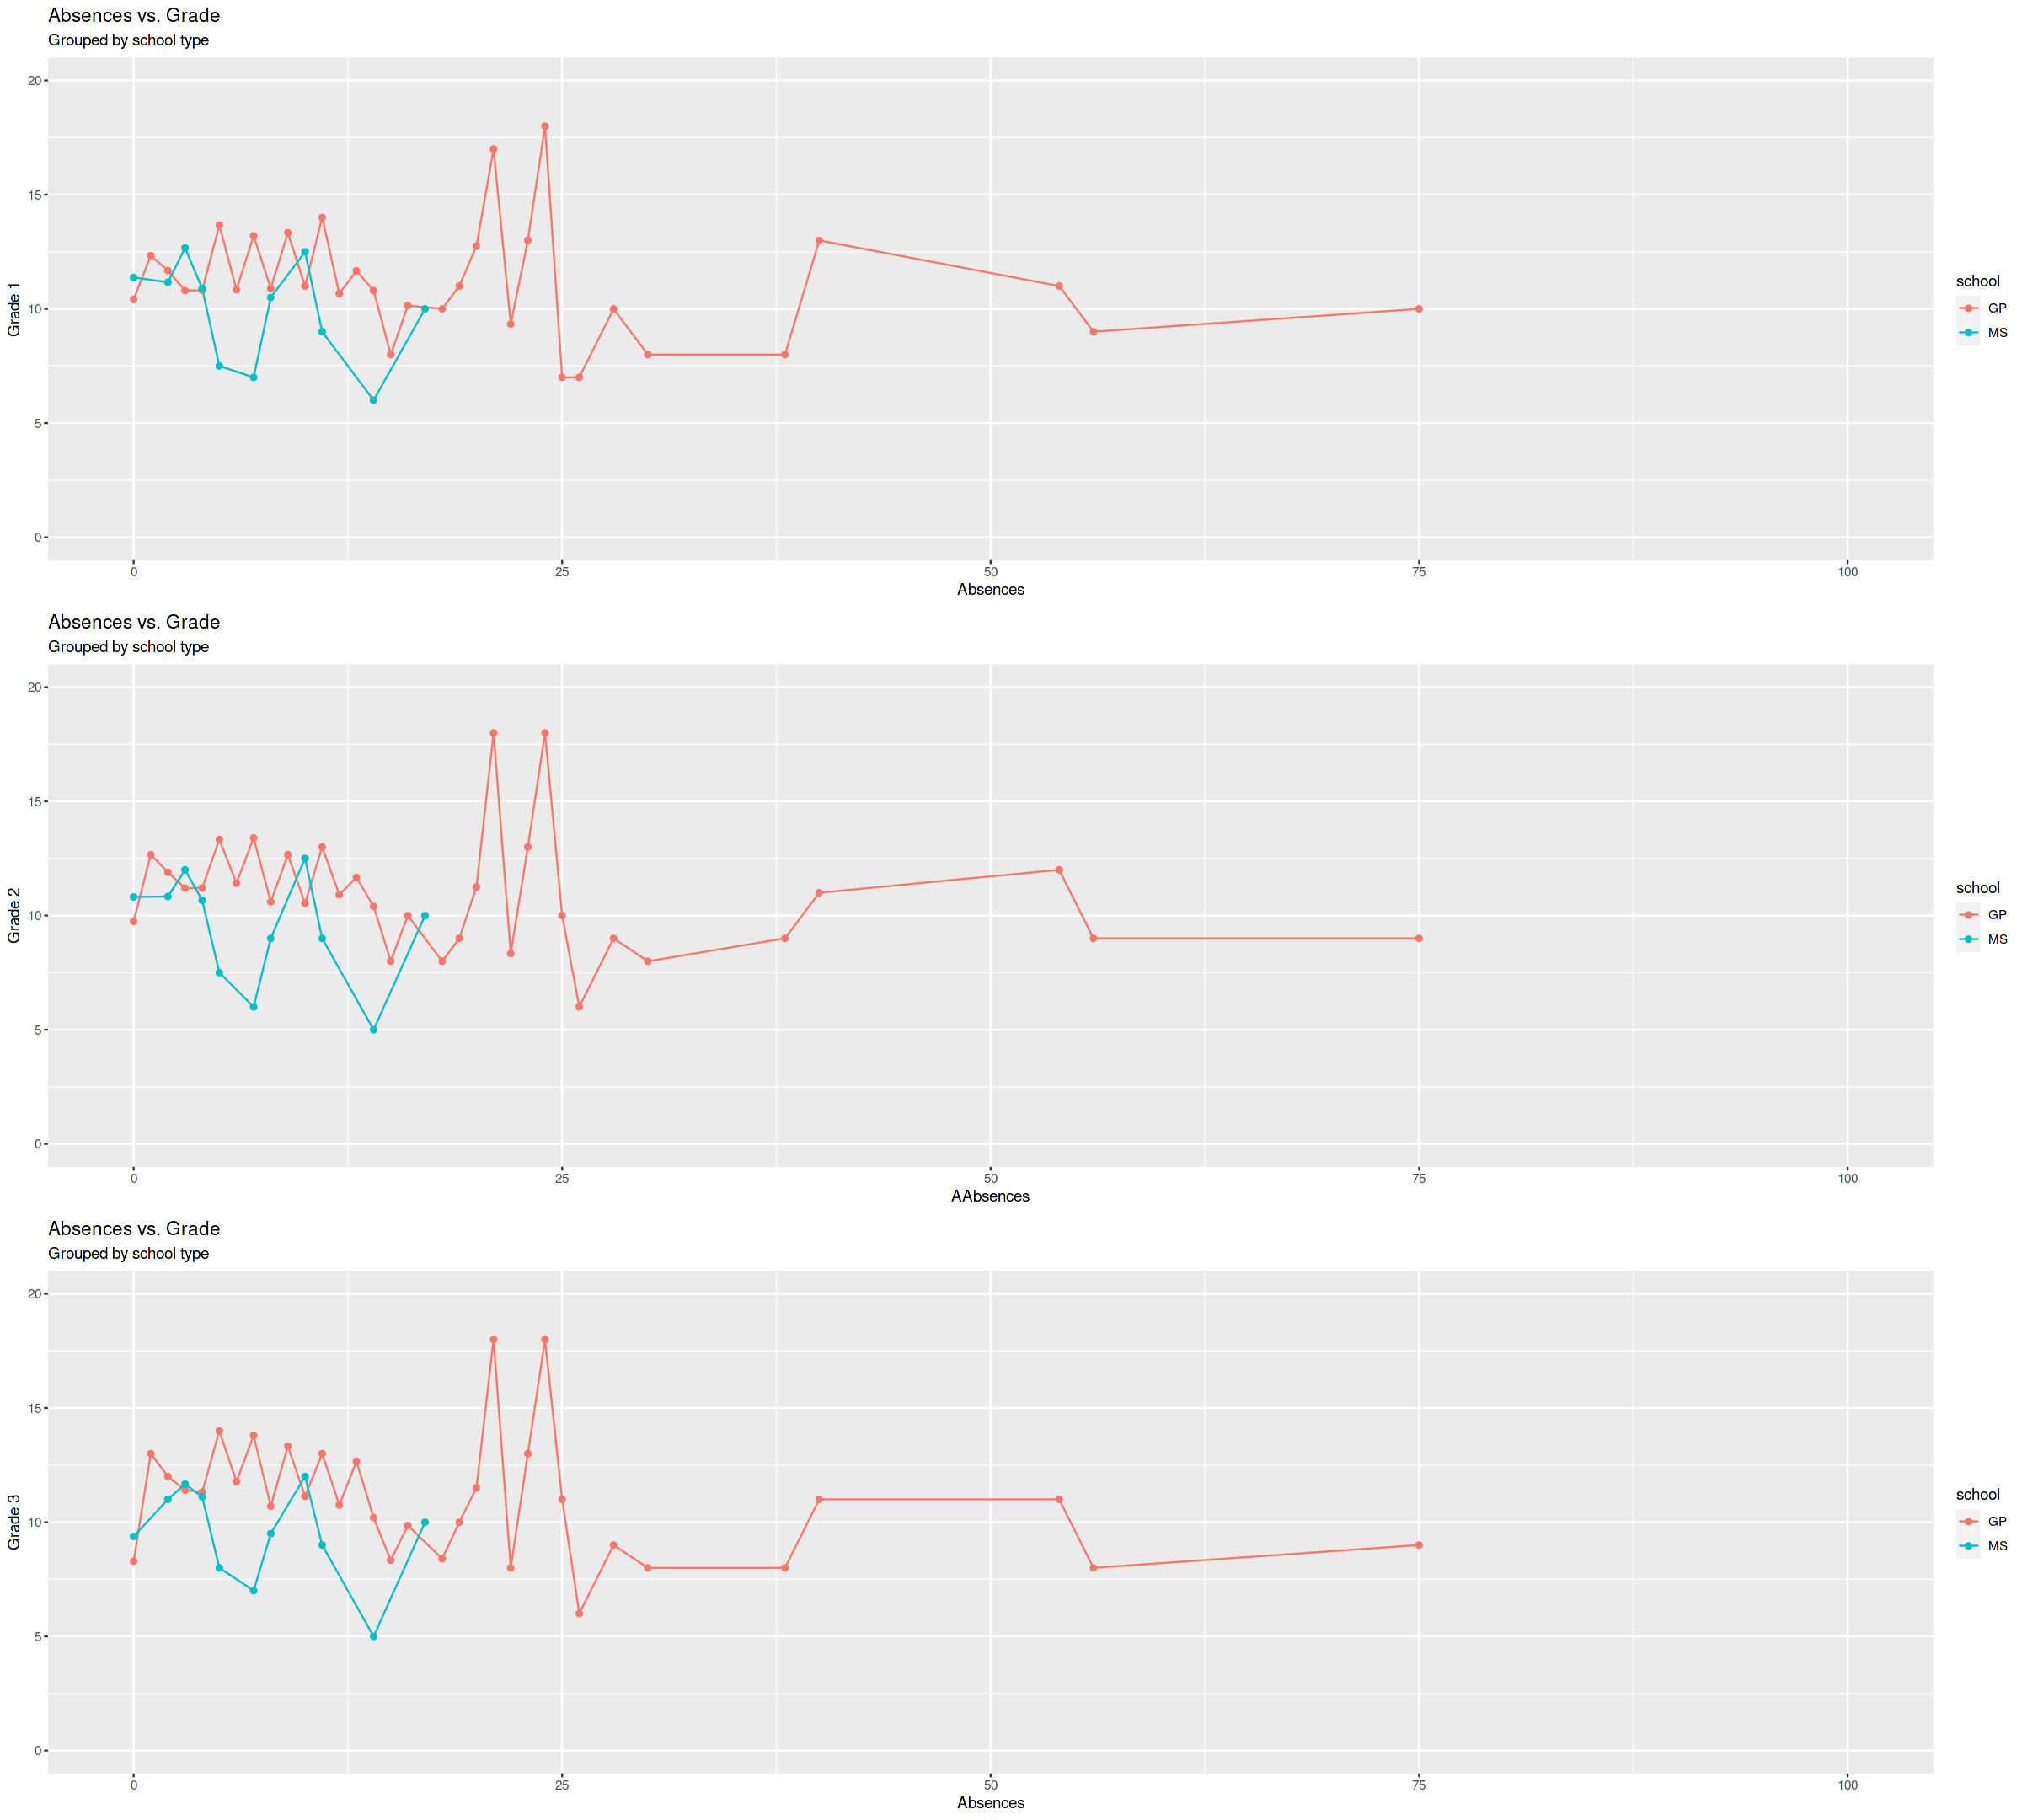

In [20]:
# Data represented as a chart
student_data_v2 %>% 
group_by(school, absences ) %>%
summarise(count = n(), avarage_grade_1 = mean(G1), avarage_grade_2 = mean(G2), avarage_grade_3 = mean(G3) )

# Size of graph
options(repr.plot.width = 20, repr.plot.height =18)

# Grade 1 data represented as a graph
graph_1 <- student_data_v2 %>% 
group_by(school, absences) %>%
summarise(count = n(), avarage_grade_1 = mean(G1)) %>%
ggplot(aes(x = absences, y = avarage_grade_1, group = school)) +
labs(title = 'Absences vs. Grade', subtitle = 'Grouped by school type', x = 'Absences', y ='Grade 1') +
geom_line(aes(color = school)) +
geom_point(aes(color = school)) +
ylim(0,20) +
xlim(0,100)

# Grade 2 data represented as a graph
graph_2 <- student_data_v2 %>% 
group_by(school, absences) %>%
summarise(count = n(), avarage_grade_2 = mean(G2)) %>%
ggplot(aes(x = absences, y = avarage_grade_2, group = school)) +
labs(title = 'Absences vs. Grade', subtitle = 'Grouped by school type', x = 'AAbsences', y ='Grade 2') +
geom_line(aes(color = school)) +
geom_point(aes(color = school)) +
ylim(0,20) +
xlim(0,100)

# Grade 3/final grade data reprented as a graph
graph_3 <- student_data_v2 %>% 
group_by(school, absences) %>%
summarise(count = n(), avarage_grade_3 = mean(G3)) %>%
ggplot(aes(x = absences, y = avarage_grade_3, group = school)) +
labs(title = 'Absences vs. Grade', subtitle = 'Grouped by school type', x = 'Absences', y ='Grade 3') +
geom_line(aes(color = school)) +
geom_point(aes(color = school)) +
ylim(0,20) +
xlim(0,100)

# Code to define graph position
grid.arrange(graph_1, graph_2, graph_3, ncol = 1)

* Student of GP who were absent for around 20-24 days, tends to do better on exam.
* Students of MS who were absent for around 3 days or 10 days, tends to do better on exam.

### Act

#### Key takeaways
* In GP school, male students have better grade. In MS school, female student haves better grade.
* In GP school, students around age of 20 did best and students of age around 22 did most bad. In MS school, students of age around 17, 18, and 20 has best grade and students of age around 19 has bad grades.
* For GP school students, they have increase of grade marks as they study more. For GP school students, they have increase of grade marks as they study more. 
* Students of GP seems to have decrease in grades as they have more failures. Students of MS seems to have low grade who has 1 and 3 failures, and better grades who has 0 and 2 failures.
* Students of GP performed better who didn't took private tution and. No student from MS took private tution and has fairy good grade.
* Having no education support didn't affect the grade of students.
* Both GP and MS school students seems to score better grade with additional paid classes.
* In GP school, students scored better grade who does Activities. In MS school, for first two exam students did better score who does activities.
* For both school who wants to take higher education, did better.
* For both school who has internet access, did better than others.
* Family relationship analysis showed that medium quality of family relationship leads to better grade for students.
* Except those students who has no free time at all, rest did fairly same type of score and better than those who don't have free time.
* 2-4 range of going out type leads to best grade.
* Health chart showed that health condition dosen't affect the score much.
* Student of GP who were absent for around 20-24 days, tends to do better on exam. Students of MS who were absent for around 3 days or 10 days, tends to do better on exam.

#### Recommendation 
* In GP school, has to focus more on female students and in MP on male students.
* In GP school, have to pay attention towards students of age 22 and in MS, students of age around 19.
* Have to encourage students to both school to study more who don't give much time into it.
* In GP school, which student has more past failure records, needs more attention. In MS school who has one or three past failure, needs more attention.
* Private tution is not recommended.
* Have to encourage both schools students to take extra paid classes.
* Both school students should do Activities, but not too much.
* Implementing the idea of taking higher education might encourage students to do better ecore.
* Internet access is recommended.
* Students should have free time after school and should go out with friends, but not too much.
* It is okay for students to take 15-25 days off in a year as that might boost their productivity.


#### Resources
* [Kaggle](https://www.kaggle.com/)
* [R studio community](https://community.rstudio.com/)